# House Prices - Advanced Regression

In [1]:
#! pip install catboost

## Introduction 🏡 

Welcome to the House Price Prediction notebook! In this project, we will be working with a dataset that describes various aspects of residential homes in Ames, Iowa. The goal of this competition is to predict the final price of each home based on a set of 79 explanatory variables. This task requires us to utilize advanced regression techniques and engage in creative feature engineering.

## Objective 🎯

Our objective is to develop a regression model that can accurately predict the price of a house in Ames, Iowa. By analyzing the provided dataset and employing advanced regression techniques such as random forest and gradient boosting, we aim to create a robust prediction model that takes into account a wide range of factors influencing house prices.

## Dataset Overview 📊

The dataset consists of a comprehensive collection of features describing residential homes. These features include the number of bedrooms, bathrooms, square footage, location, amenities, age of the property, and many other relevant factors. By exploring and analyzing this dataset, we can gain insights into the factors that influence house prices and use this knowledge to build an effective prediction model.

## Approach 📝

1. **Basic Data Cleaning and Feature Exploration**: We will start by performing basic data cleaning tasks such as handling missing values, outliers, and inconsistencies. Additionally, we will explore the features in the dataset to gain initial insights into their distributions and relationships with the target variable.

2. **Exploratory Data Analysis**: In this stage, we will conduct a detailed exploratory data analysis (EDA) to uncover patterns, relationships, and key insights from the dataset. We will visualize the data using charts, graphs, and statistical summaries to understand the distributions, correlations, mutual information, and potential outliers.

3. **Data Engineering (Creating a Pipeline for Train and Test Sets)**: Here, we will prepare the data for model training and testing. This involves splitting the dataset into training and testing sets, handling categorical variables through encoding techniques, and performing any necessary feature scaling or normalization.

4. **Feature Engineering**: Building upon the initial set of features, we will create new features or transform existing ones to capture additional information that can enhance the predictive power of our models. This may involve feature extraction, feature combination, or feature scaling techniques.

5. **Model Experimentation and Parameter Tuning**: In this stage, we will experiment with various regression models, starting with Linear Regression, Random Forest, XGBoost, and Catboost. We will train these models on the training dataset, tune their hyperparameters using techniques like grid search or randomized search, and evaluate their performance using appropriate metrics.

6. **Submitting to the Competition**: Once we have identified the best-performing model and optimized its parameters, we will use it to make predictions on the test dataset. We will then submit our predictions to the competition and evaluate our performance against the provided evaluation metric.

## Conclusion ✨

By the end of this notebook, we aim to develop a reliable house price prediction model that can effectively estimate the prices of residential homes in Ames, Iowa. Through creative feature engineering and the implementation of advanced regression techniques, we will strive to achieve accurate predictions that capture the complex dynamics of the housing market.

Now let's dive into the exciting world of house price prediction and get started with the data exploration and preprocessing stages!

In [1]:
# import necessory packages
import pandas as pd  # making dataset and work dataset. 
import numpy as np # numpy for linear algebra and array

# Visualization library
import matplotlib.pyplot as plt
import seaborn as sns

# Data Egineering methods
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# different Machine learning modeL
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import GridSearchCV, KFold, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.feature_selection import mutual_info_regression


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
# import house_price csv files
train = pd.read_csv('Housetrain.csv')
test = pd.read_csv('Housetest.csv')

In [3]:
# create a copy of train data
df = train.copy()
df_test = test.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# categorized data type based on unique value
def categorize_columns(df):
    categorical_cols = [col for col in df.columns if 1 < len(df[col].unique()) < 26]
    numerical_cols = [col for col in df.columns if col not in categorical_cols]
    
    df[categorical_cols] = df[categorical_cols].astype("category")

    return categorical_cols, numerical_cols

categorical, numerical = categorize_columns(df)

print("\n Length of categorical list: {} \n".format(len(categorical)))
print(categorical)
print("\n Length of numerical list: {}".format(len(numerical)))
print(numerical)



 Length of categorical list: 61 

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', '3SsnPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']

 Length of numerical list: 20
['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'B

# Basic Data Exploration

1. **Summary Statistics** - This will give an overview of the central tendency and spread of the data.
2. **Concise Summary** - This will give a concise summary of the DataFrame's information.
3. **Evaluate Null Values** - Evaluate certain "NaN" (Not a Number) or "NA" (Not Available) values in the dataset.


In [9]:
numerical_features = df.select_dtypes(include=[np.number])
summary_stats_numerical = numerical_features.describe().T
 
pd.set_option('display.max_rows',summary_stats_numerical.shape[0]+1 )

summary_stats_numerical

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0


In [10]:
categorical_features = df.select_dtypes(include=['object', 'category'])
summary_stats_categorical = categorical_features.describe().T

pd.set_option('display.max_rows',summary_stats_categorical.shape[0]+1 )
summary_stats_categorical

,count,unique,top,freq
MSSubClass,1460,15,20,536
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225


In [11]:
# null values
missing_values = (df.isnull().sum())
missing_values_filtered = missing_values[missing_values > 0]
missing_values_filtered

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [12]:
missing_values = (df.isnull().sum() / len(df)) * 100
missing_values

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [13]:
# null values percentage greater than 10%
missing_values = (df.isnull().sum() / len(df)) * 100
missing_values_percentage = missing_values[missing_values > 10].sort_values(ascending = False)
missing_values_percentage

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
FireplaceQu    47.260274
LotFrontage    17.739726
dtype: float64

In [14]:
# rows with null value columns greater than 13
rows_with_null = df[df.isnull().sum(axis=1) >  13]
rows_with_null

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,40,90,RL,65.0,6040,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
520,521,190,RL,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,106250
533,534,20,RL,50.0,5000,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,39300
705,706,190,RM,70.0,5600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Othr,3500,7,2010,WD,Normal,55000
1011,1012,90,RL,75.0,9825,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,100000
1179,1180,20,RL,77.0,8335,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,93000
1218,1219,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,80500


After evaluation, we can choose to drop the rows that contain a significant number of null values in their columns. While it is possible to impute these null values through various methods, it may be more appropriate to simply drop the rows with a high number of null values.

In [15]:
# index of the rows which have null values more than 13
rows_index_with_null = rows_with_null.index
rows_index_with_null

Int64Index([39, 520, 533, 705, 1011, 1179, 1218], dtype='int64')

# Exploratory Data Analysis

1. **Scatter plots** - Use scatter plots to visualize the relationship between the target variable (house prices) and numerical features.
2. **Reg plots** - Use scatter plot and fits a regression line to the data points.
3. **Box plots** - Utilize box plots to identify potential outliers and understand the distribution of the target variable.
4. **Histograms** - Use histograms to visualize the distribution of numerical features.
5. **Cat plot** - Use cat plot to to visualize the distribution of the target variable based on categorical features and numerical features.
6. **Heatmap** - Use heatmap to explore the correlation between numerical features and the target variable.
7. **Mutual Information** - Use to determine the significance of individual features in predicting the target variable. This will tell the importance of the features.

#### Mutual Information

In [16]:
mi_df = df.copy()

Initial null value imputation is used for categorical data encoding and to facilitate the mutual information procedure. More comprehensive imputation will be conducted later to ensure data integrity and accuracy during the analysis.

In [17]:
# Numerical and categorical encoding
def encoding_numeric_categoric(dataframe):
    numerical_features = dataframe.select_dtypes([np.number])
    categorical_features = dataframe.select_dtypes(["object", "category"])

    # Fill null in numerical features
    for col in numerical_features:
        dataframe[col].fillna(dataframe[col].median(), inplace = True)
    # Label encoding for categorical features
    for col in categorical_features:
        dataframe[col], _ = dataframe[col].factorize()

In [18]:
encoding_numeric_categoric(mi_df)
mi_y = mi_df.pop("SalePrice")

In [19]:
def make_mi_score(X, y):
    mi_score = mutual_info_regression(X, y)
    mi_features = pd.Series(mi_score, name = "MI Score", index = X.columns).sort_values(ascending = False)
    return mi_features

mi_score = make_mi_score(mi_df, mi_y)

Mutual Information for Top 20 Features

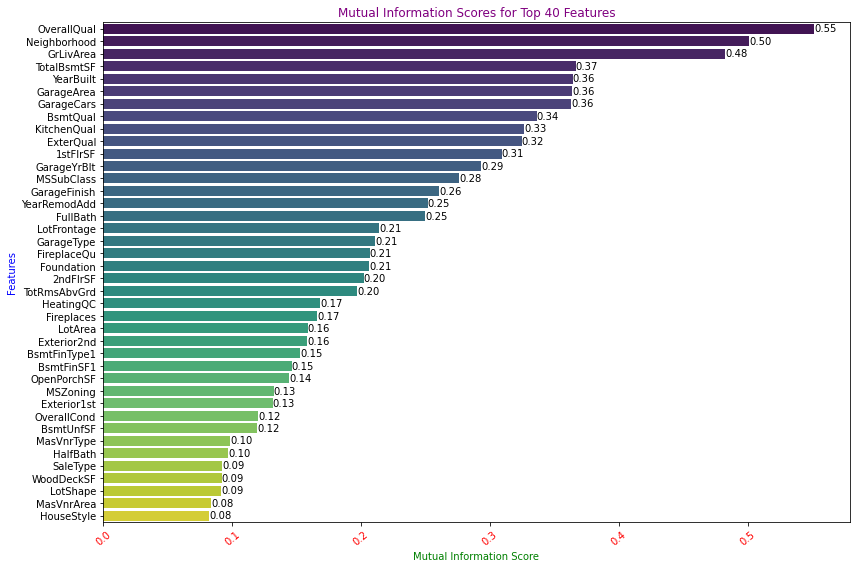

In [20]:
def plot_mi_score(score):
    # Number of features
    top_n = 40

    # Top features
    top_features = score[:top_n]

    # Define a colorful color palette for the bars
    colors = sns.color_palette('viridis', n_colors=len(top_features))

    plt.figure(figsize=(12, 8))
    sns.barplot(x=top_features.values, y=top_features.index, orient='h', palette=colors)
    plt.title('Mutual Information Scores for Top {} Features'.format(top_n), color='purple')
    plt.xlabel('Mutual Information Score', color='green')
    plt.ylabel('Features', color='blue')
    plt.xticks(rotation=40, color='red')

    # Add the value labels to the bars
    for index, value in enumerate(top_features.values):
        plt.text(value, index, f'{value:.2f}', color='black', ha='left', va='center')

    plt.tight_layout()  
    return plt.show()

plot_mi_score(mi_score)

Divide Top features based on data type

In [21]:
def top_numeric_categoric(features, df):
    top_numerical_features = df[features.index].select_dtypes([np.number])
    top_categorical_features = df[features.index].select_dtypes(["object", "category"])

    top_numerical_columns = top_numerical_features.columns
    top_categorical_columns = top_categorical_features.columns

    return top_numerical_columns, top_categorical_columns

Top_features = mi_score[:40]
top_numeric, top_categoric = top_numeric_categoric(Top_features, df)

print("Top numeric features:", top_numeric, end="\n\n")
print("Top categoric features", top_categoric)

Top numeric features: Index(['GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'GarageArea', '1stFlrSF',
       'GarageYrBlt', 'YearRemodAdd', 'LotFrontage', '2ndFlrSF', 'LotArea',
       'BsmtFinSF1', 'OpenPorchSF', 'BsmtUnfSF', 'WoodDeckSF', 'MasVnrArea'],
      dtype='object')

Top categoric features Index(['OverallQual', 'Neighborhood', 'GarageCars', 'BsmtQual', 'KitchenQual',
       'ExterQual', 'MSSubClass', 'GarageFinish', 'FullBath', 'GarageType',
       'FireplaceQu', 'Foundation', 'TotRmsAbvGrd', 'HeatingQC', 'Fireplaces',
       'Exterior2nd', 'BsmtFinType1', 'MSZoning', 'Exterior1st', 'OverallCond',
       'MasVnrType', 'HalfBath', 'SaleType', 'LotShape', 'HouseStyle'],
      dtype='object')


In [22]:
# convert the pandas Index objects to Python lists
top_numerics = list(top_numeric)
top_categoric = list(top_categoric)

Explore the depending variable

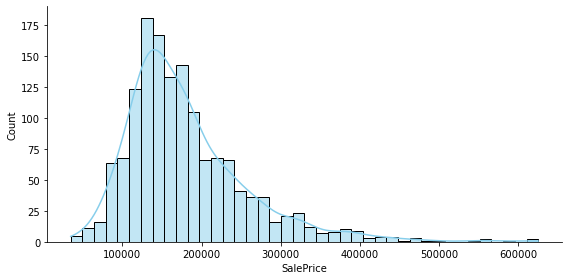

In [23]:
# Define the upper bound value for zooming in
upper_bound = 700000
sns.displot(df.query('SalePrice < @upper_bound')['SalePrice'], kde=True, color='skyblue', height=4, aspect=2)

## Correation Heatmap

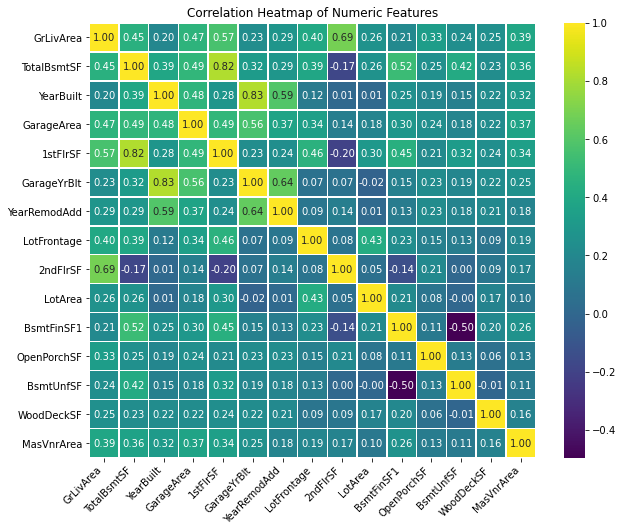

In [24]:
# Compute the correlation matrix for the numeric features
corr_matrix = df[top_numerics].corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=0.5, fmt=".2f")

# Set plot title
plt.title('Correlation Heatmap of Numeric Features', fontsize=12)
plt.xticks(rotation=45 ,ha='right')
# Show the plot
plt.show()


Multicollinearity features pair for entire dataset 

In [25]:
def multicollinearity(matrix):
    # Set a threshold for high correlation
    threshold_pos = 0.80
    threshold_neg = -0.80

    # Find pairs of features with high positive correlation
    high_corr_positive = (matrix > threshold_pos) & (matrix < 1.0)

    # Find pairs of features with high negative correlation
    high_corr_negative = (matrix < threshold_neg) & (matrix > -1.0)

    # Combine both dataframes to get all pairs with high correlation (positive and negative)
    high_corr_pairs = high_corr_positive | high_corr_negative

    # Get the feature pairs with high correlation and their correlation values
    pairs_with_high_corr = [(i, j, matrix.loc[i, j]) for i in high_corr_pairs.columns for j in high_corr_pairs.index if high_corr_pairs.loc[i, j]]

    # Print the pairs of features with their correlation values
    for pair in pairs_with_high_corr:
        print(f"Features: {pair[0]}, {pair[1]} - Correlation: {pair[2]}")

corr_matrix = mi_df.corr()
multicollinearity(corr_matrix)


Features: TotalBsmtSF, 1stFlrSF - Correlation: 0.8195299750050339
Features: 1stFlrSF, TotalBsmtSF - Correlation: 0.8195299750050339
Features: PoolArea, PoolQC - Correlation: 0.9166906621198595
Features: PoolQC, PoolArea - Correlation: 0.9166906621198595


<ipython-input-26-b29f1e8fbd4e>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), fontsize=8)
<ipython-input-26-b29f1e8fbd4e>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['${:,.0f}'.format(values) for values in y_ticks], fontsize=8)


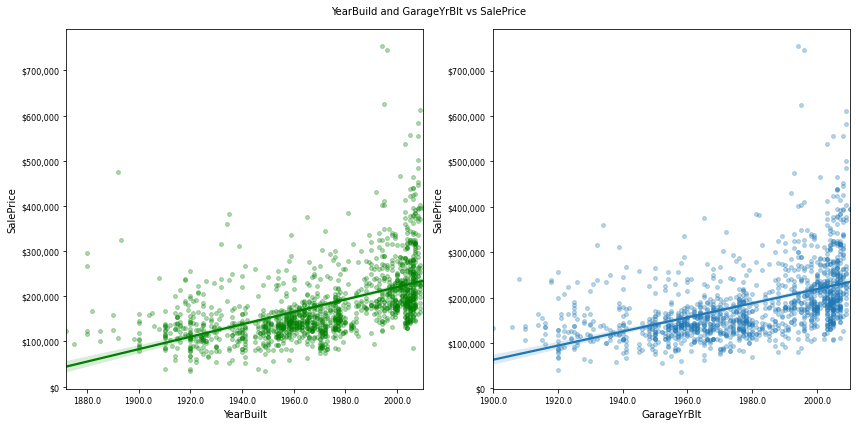

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))
sns.regplot(data=df, x='YearBuilt', y='SalePrice', color='green', fit_reg=True, scatter_kws={'s': 60, 'alpha': 0.3}, ax=axes[0], marker='.')
sns.regplot(data=df, x='GarageYrBlt', y='SalePrice', scatter_kws={'s': 60, 'alpha': 0.3}, fit_reg=True, ax=axes[1], marker='.')

for ax in axes:
    ax.set_xticklabels(ax.get_xticks(), fontsize=8)
    y_ticks = ax.get_yticks()
    ax.set_yticklabels(['${:,.0f}'.format(values) for values in y_ticks], fontsize=8)

fig.suptitle("YearBuild and GarageYrBlt vs SalePrice", fontsize=10)

plt.tight_layout()
plt.show()

## Plot the data distribution

## Scatter plot

<ipython-input-27-5d110e74b59a>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(values) for values in y_ticks])


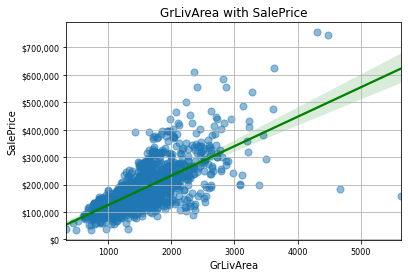

<ipython-input-27-5d110e74b59a>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(values) for values in y_ticks])


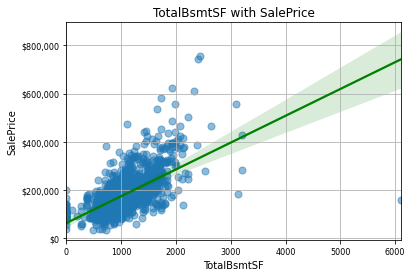

<ipython-input-27-5d110e74b59a>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(values) for values in y_ticks])


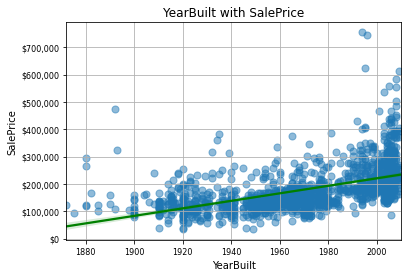

<ipython-input-27-5d110e74b59a>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(values) for values in y_ticks])


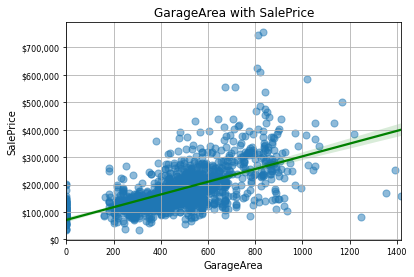

<ipython-input-27-5d110e74b59a>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(values) for values in y_ticks])


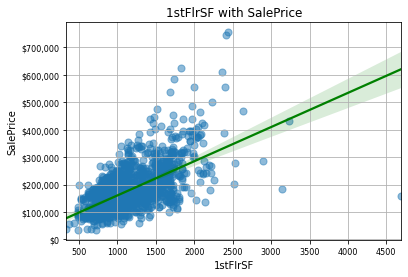

<ipython-input-27-5d110e74b59a>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(values) for values in y_ticks])


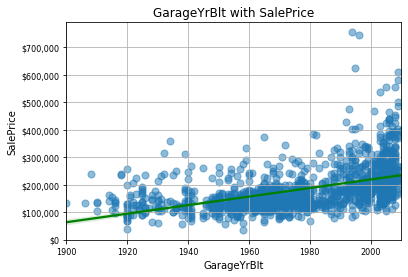

<ipython-input-27-5d110e74b59a>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(values) for values in y_ticks])


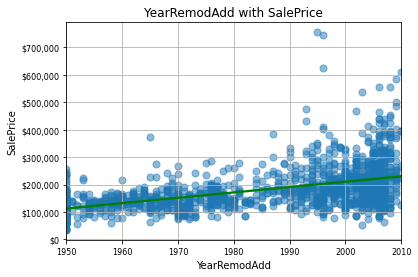

<ipython-input-27-5d110e74b59a>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(values) for values in y_ticks])


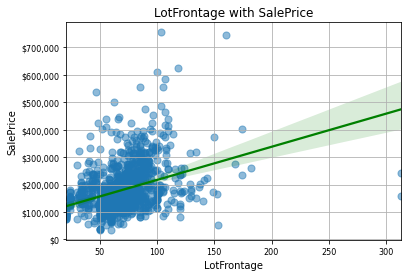

<ipython-input-27-5d110e74b59a>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(values) for values in y_ticks])


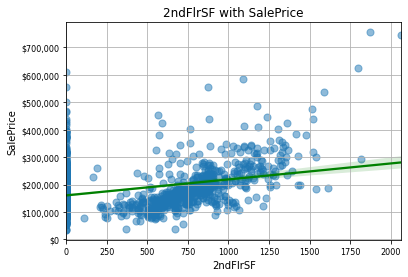

<ipython-input-27-5d110e74b59a>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(values) for values in y_ticks])


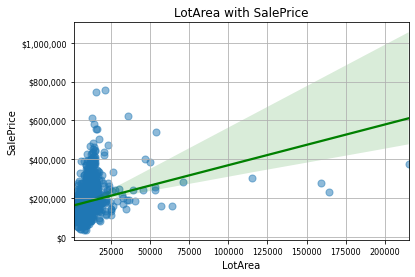

<ipython-input-27-5d110e74b59a>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(values) for values in y_ticks])


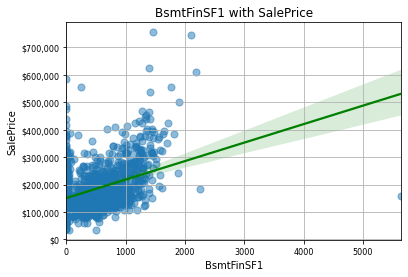

<ipython-input-27-5d110e74b59a>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(values) for values in y_ticks])


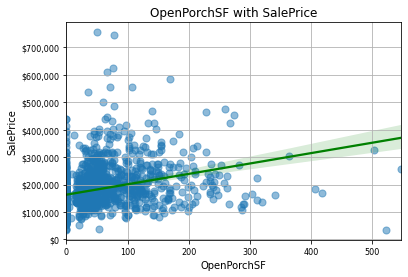

<ipython-input-27-5d110e74b59a>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(values) for values in y_ticks])


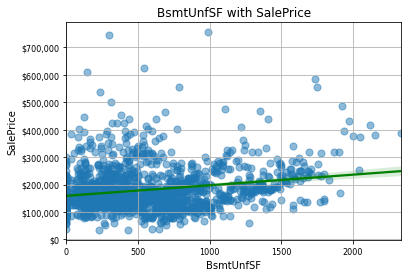

<ipython-input-27-5d110e74b59a>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(values) for values in y_ticks])


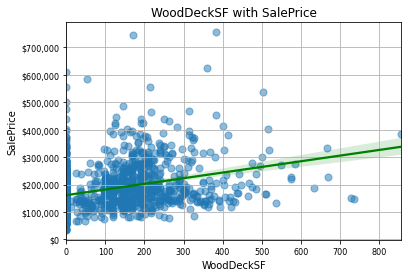

<ipython-input-27-5d110e74b59a>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(values) for values in y_ticks])


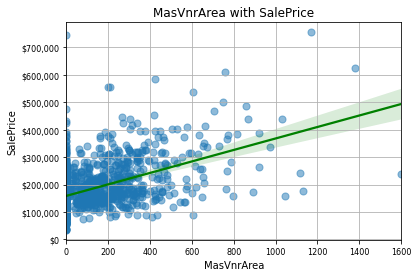

In [27]:
# Scatter plot with regression line for 'Top numeric features' and 'SalePrice'
for features in top_numerics:
    sns.regplot(x=features, y='SalePrice', data=df, scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'green'})

    # Set plot title and labels
    plt.title(f'{features} with SalePrice', fontsize=12)
    plt.xlabel(features, fontsize=10)
    plt.ylabel('SalePrice', fontsize=10)

    # Customize the grid and ticks
    plt.grid(True)

    y_ticks = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['${:,.0f}'.format(values) for values in y_ticks])
    
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

    # Show the plot
    plt.show()

### Box plot

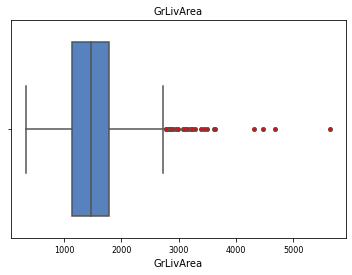

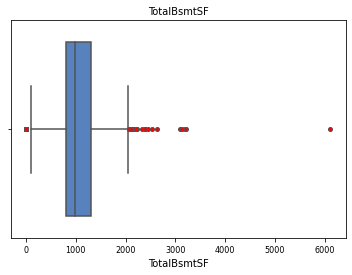

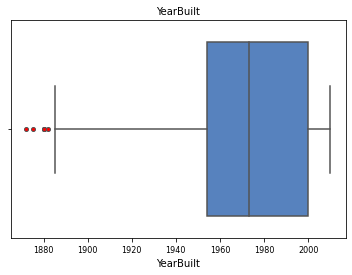

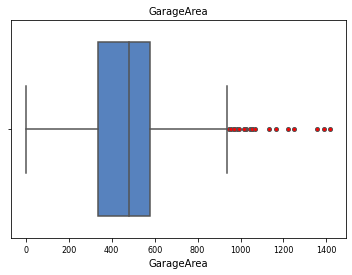

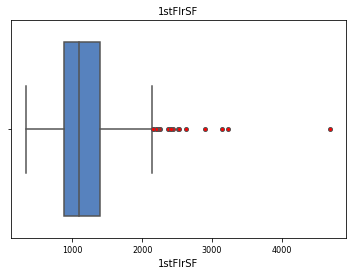

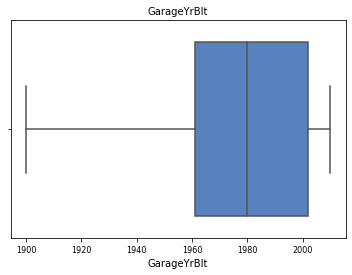

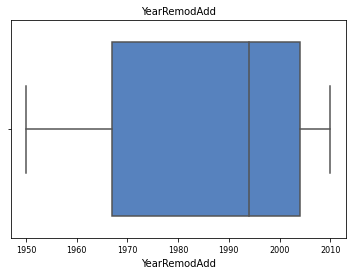

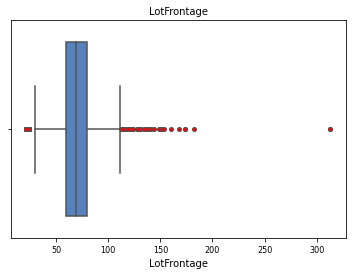

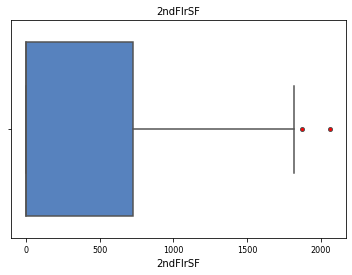

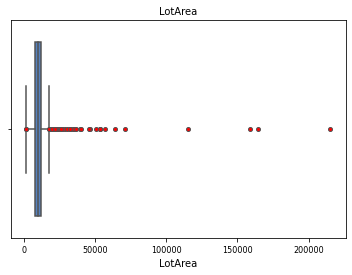

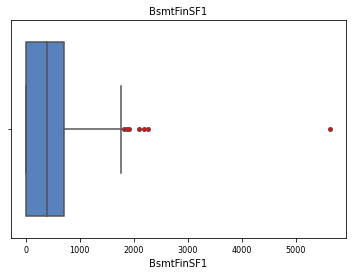

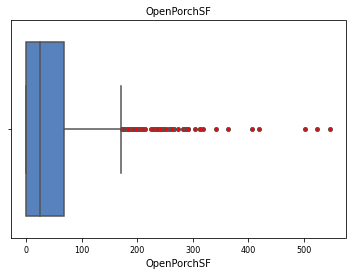

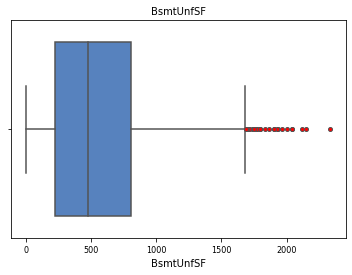

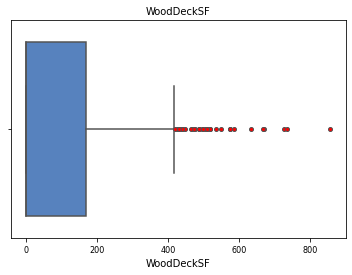

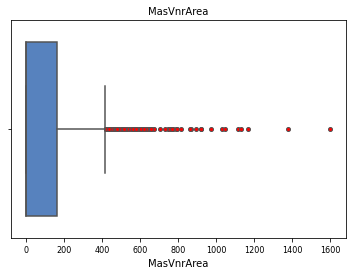

In [28]:
# Box and whicker plot for 'Top numeric features'
for features in top_numerics:
    sns.boxplot(x=features, data=df, color='#467fcf', showfliers=True, flierprops=dict(marker='o', markerfacecolor='red', markersize=4))

    # Set plot title and labels
    plt.title(f'{features}', fontsize=10)
    plt.xlabel(features, fontsize=10)
    plt.xticks(fontsize=8)
    
    # Show the plot
    plt.show()

### Bar plot

<ipython-input-29-f1f11e3c2cde>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(values) for values in y_ticks])


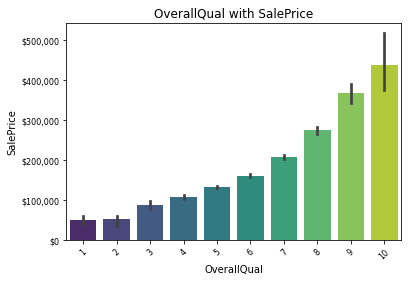

<ipython-input-29-f1f11e3c2cde>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(values) for values in y_ticks])


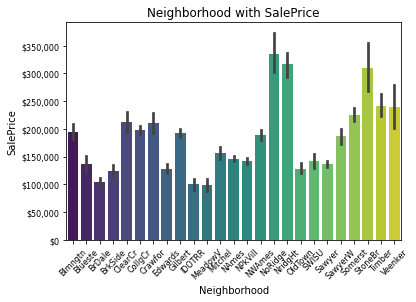

<ipython-input-29-f1f11e3c2cde>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(values) for values in y_ticks])


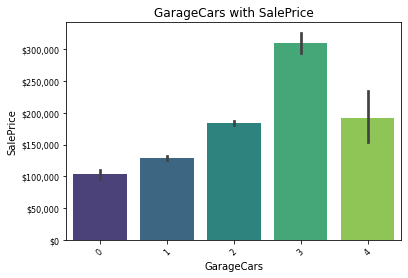

<ipython-input-29-f1f11e3c2cde>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(values) for values in y_ticks])


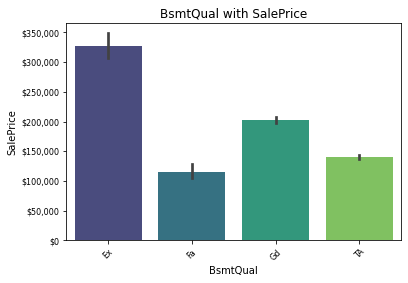

<ipython-input-29-f1f11e3c2cde>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(values) for values in y_ticks])


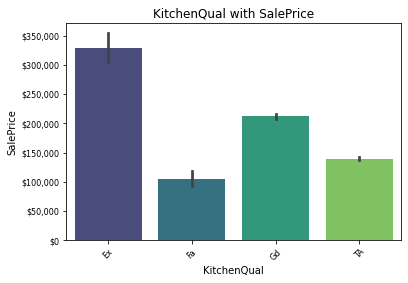

<ipython-input-29-f1f11e3c2cde>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(values) for values in y_ticks])


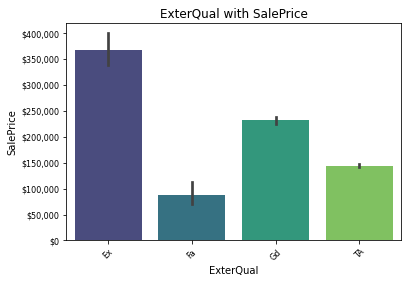

<ipython-input-29-f1f11e3c2cde>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(values) for values in y_ticks])


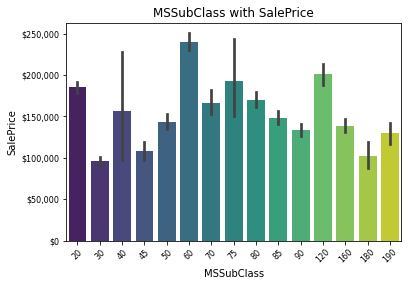

<ipython-input-29-f1f11e3c2cde>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(values) for values in y_ticks])


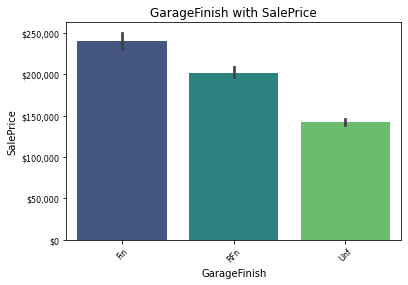

<ipython-input-29-f1f11e3c2cde>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(values) for values in y_ticks])


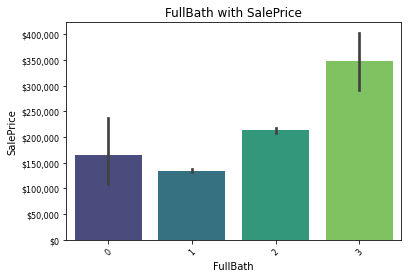

<ipython-input-29-f1f11e3c2cde>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(values) for values in y_ticks])


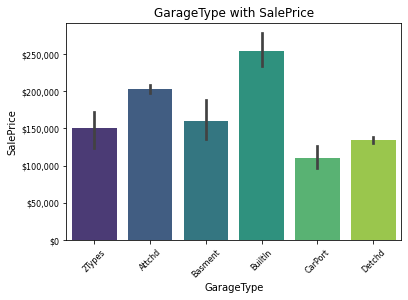

<ipython-input-29-f1f11e3c2cde>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(values) for values in y_ticks])


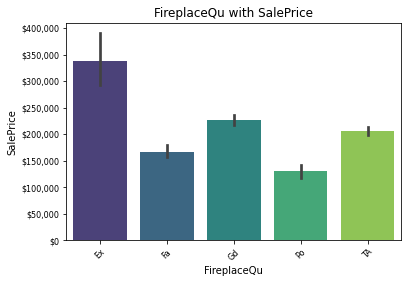

<ipython-input-29-f1f11e3c2cde>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(values) for values in y_ticks])


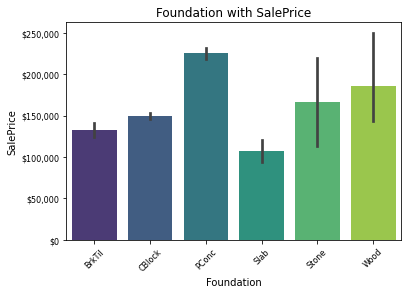

<ipython-input-29-f1f11e3c2cde>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(values) for values in y_ticks])


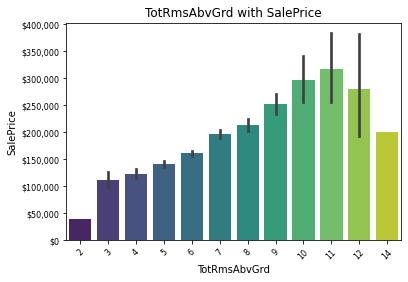

<ipython-input-29-f1f11e3c2cde>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(values) for values in y_ticks])


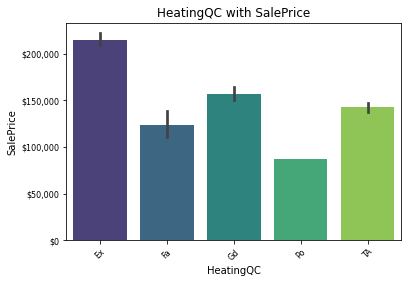

<ipython-input-29-f1f11e3c2cde>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(values) for values in y_ticks])


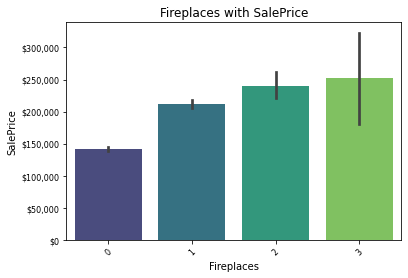

<ipython-input-29-f1f11e3c2cde>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(values) for values in y_ticks])


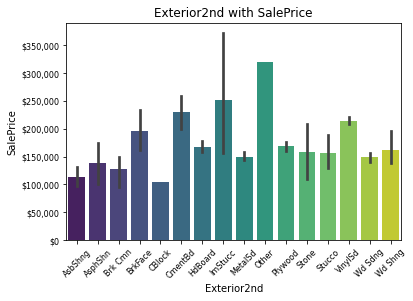

<ipython-input-29-f1f11e3c2cde>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(values) for values in y_ticks])


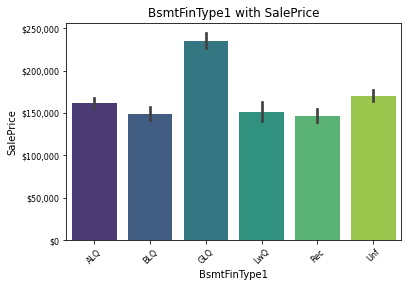

<ipython-input-29-f1f11e3c2cde>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(values) for values in y_ticks])


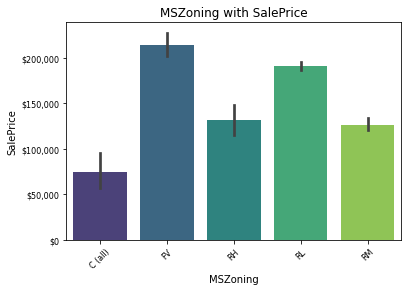

<ipython-input-29-f1f11e3c2cde>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(values) for values in y_ticks])


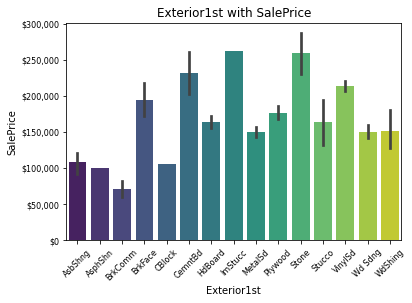

<ipython-input-29-f1f11e3c2cde>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(values) for values in y_ticks])


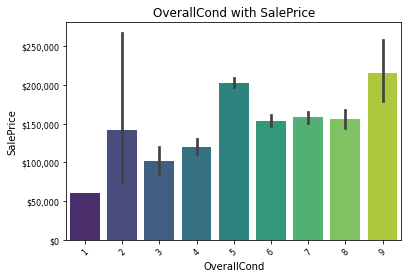

<ipython-input-29-f1f11e3c2cde>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(values) for values in y_ticks])


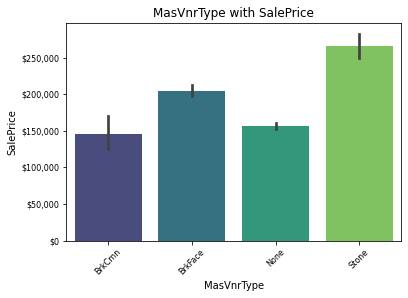

<ipython-input-29-f1f11e3c2cde>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(values) for values in y_ticks])


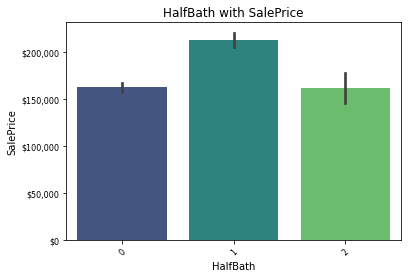

<ipython-input-29-f1f11e3c2cde>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(values) for values in y_ticks])


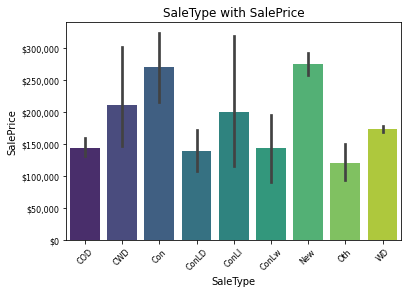

<ipython-input-29-f1f11e3c2cde>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(values) for values in y_ticks])


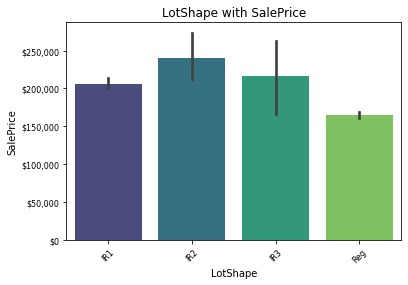

<ipython-input-29-f1f11e3c2cde>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(values) for values in y_ticks])


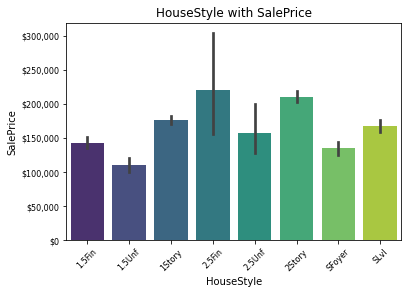

In [29]:
# Bar plot with regression line for 'Top categorical features' and 'SalePrice'
for features in top_categoric:
    sns.barplot(x=features, y='SalePrice', data=df, palette='viridis')

    # Set plot title and labels
    plt.title(f'{features} with SalePrice', fontsize=12)
    plt.xlabel(features, fontsize=10)
    plt.ylabel('SalePrice', fontsize=10)

    plt.xticks(rotation=45)

    y_ticks = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['${:,.0f}'.format(values) for values in y_ticks])
    
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    
    # Show the plot
    plt.show()


# Data Engineering


1. Creating a Pipeline - Use pipelines to streamline and automate the data preprocessing and modeling process, making it easier to apply multiple steps and avoid data leakage.
2. Handling categorical variables - Converting categorical data into numerical format is essential for machine learning algorithms to process the data, as most models require numeric inputs.
3. Feature Scaling - Feature scaling ensures that all features have similar scales, preventing one feature from dominating the others, which can lead to biased model performance and faster
   convergence during training.

In [30]:
# training dataset
df.sample(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
626,627,20,RL,NaN,12342,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,Shed,600,8,2007,WD,Normal,139900
1038,1039,160,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,97000
765,766,20,RL,75.0,14587,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,New,Partial,264132
1332,1333,20,RL,67.0,8877,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,100000


In [31]:
# testing dataset
df_test.sample(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
116,1577,20,RL,64.0,7360,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1124,2585,20,RL,80.0,10000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2007,WD,Normal
960,2421,20,RL,75.0,9532,Pave,NaN,Reg,Lvl,AllPub,...,0,368,NaN,GdPrv,NaN,0,2,2007,WD,Normal
291,1752,20,RL,62.0,7130,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,NaN,0,6,2009,WD,Normal


In [32]:
# missing values in the training dataset
missing_values_filtered

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Next, we are going to drop the columns that have a higher null percentage and highly correatted features.

In [33]:
# null values percentage greater than 10%
missing_values_percentage

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
FireplaceQu    47.260274
LotFrontage    17.739726
dtype: float64

There are many other techniques available to address multicollinearity without dropping columns. However, in this case, we will proceed with dropping the columns that are highly correlated with each other.

**YearBuilt and GarageYrBlt** - These two features have a high correlation of 0.8006. Since both features are related to the year, it may be reasonable to keep only one of them.

**TotalBsmtSF and 1stFlrSF** - These features also have a high correlation of 0.8635. Since both represent the area of the house, you may choose to keep only one of them.

**PoolArea and PoolQC** These features have the highest correlation of 0.9167. Since both are related to the pool, it may be redundant to keep both.

In [34]:
multicollinearity(corr_matrix)

Features: TotalBsmtSF, 1stFlrSF - Correlation: 0.8195299750050339
Features: 1stFlrSF, TotalBsmtSF - Correlation: 0.8195299750050339
Features: PoolArea, PoolQC - Correlation: 0.9166906621198595
Features: PoolQC, PoolArea - Correlation: 0.9166906621198595


In [35]:
df_train_pipeline_1 = train.copy()
df_test_pipeline_1 = df_test.copy()

In [36]:
# Drop rows which have null values columns more than 13
df_train_pipeline_1.drop(rows_index_with_null, axis=0, inplace=True)

In [37]:
# columns to be dropped
columns_to_drop = ['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence']

In [38]:
def final_cleaned(df, df_test, columns_to_drop):

    df.drop(columns=columns_to_drop, axis=1, inplace=True)
    df_test.drop(columns=columns_to_drop, axis=1, inplace=True)

    print("Column count in training dataset: {}".format(len(df.columns)))
    print("Column count in testing dataset: {}".format(len(df_test.columns)))

    categorical_features = df.select_dtypes(include=["object", "category"]).columns
    numerical_features = df.select_dtypes(include=[np.number]).columns

    return categorical_features, numerical_features

In [39]:
categorical_features, numerical_features = final_cleaned(df_train_pipeline_1, df_test_pipeline_1, columns_to_drop)

Column count in training dataset: 76
Column count in testing dataset: 75


## Pipeline Creation

### Pipeline without Feature Engineering

In [40]:
# Preprocessing step for numerical columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler())
])

# Preprocessing step for categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse = False))
]) 

numerical_cols = numerical_features
categorical_cols = categorical_features

# Remove the target variable
numerical_cols = numerical_cols.drop("SalePrice")

# Combine both transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols),
    ], remainder="passthrough"
)

In [41]:
# Create pipeline with the preprocessor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF',...
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object'))]))])

In [42]:
# Apply the pipeline
X = df_train_pipeline_1.drop("SalePrice", axis=1)
# Normalized the dependent variable
y = np.log(df_train_pipeline_1["SalePrice"])

# fit and transform
X_preprocessed_pipeline1 = pipeline.fit_transform(X)
X_test_preprocessed_pipeline1 = pipeline.transform(df_test_pipeline_1)

C:\Users\Python100problems\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Feature Engineering

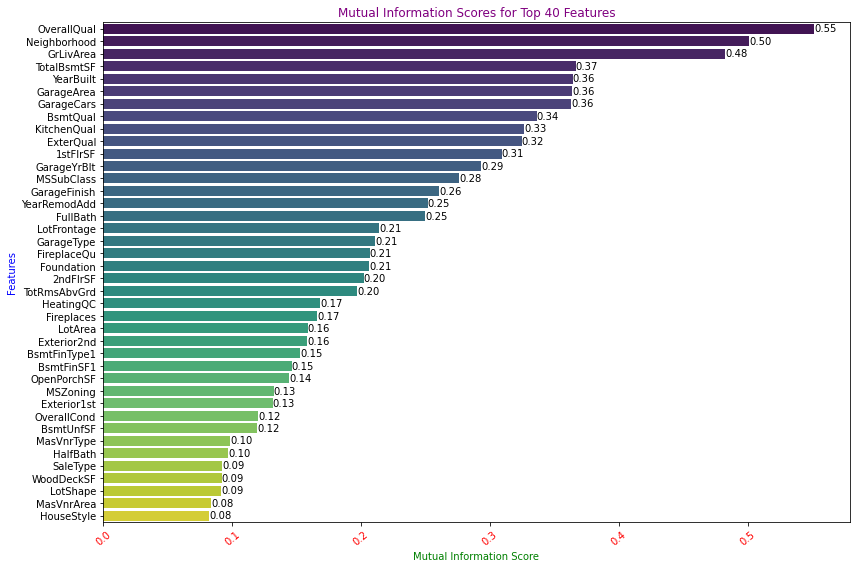

In [44]:
# MI score before the feature engineering
plot_mi_score(mi_score)

In [45]:
def custom_features(df):
    df_out = df.copy()

    df_out['YrSold'] = df_out['YrSold'].astype(int)
    df_out['FullBath'] = df_out['FullBath'].astype(float)
    df_out['BsmtFullBath'] = df_out['BsmtFullBath'].astype(float)
    df_out['HalfBath'] = df_out['HalfBath'].astype(float)
    df_out['BsmtHalfBath'] = df_out['BsmtHalfBath'].astype(float)
    df_out['OverallQual'] = df_out['OverallQual'].astype(int)
    df_out['OverallCond'] = df_out['OverallCond'].astype(int)
    df_out['TotRmsAbvGrd'] = df_out['TotRmsAbvGrd'].astype(int)
    df_out['KitchenAbvGr'] = df_out['KitchenAbvGr'].astype(int)

    df_out['Total_SF'] = (df_out['1stFlrSF'] + df_out['2ndFlrSF'] + df_out['TotalBsmtSF'] + df_out['GarageArea']).astype(float)
    df_out['Total_Bath'] = (df_out['FullBath'] + 0.5 * df_out['BsmtFullBath'] + 0.4 * df_out['HalfBath'] + 0.3 * df_out['BsmtHalfBath']).astype(float)
    df_out['Total_quality'] = (df_out['OverallQual'] + 0.2 * df_out["OverallCond"]).astype(float)
    df_out['Total_AbcGr'] = (df_out['TotRmsAbvGrd'] + df_out['KitchenAbvGr'] + df_out['FullBath'] + df_out['HalfBath']).astype(int)

    
    return df_out

feature_enginerring_transformer = FunctionTransformer(custom_features)

In [46]:
# Enhance the datset with feature engineering
df_out = custom_features(train)

In [47]:
mi_df_out = df_out.copy()

In [48]:
encoding_numeric_categoric(mi_df_out)
mi_y = mi_df_out.pop("SalePrice")
mi_scores = make_mi_score(mi_df_out, mi_y)

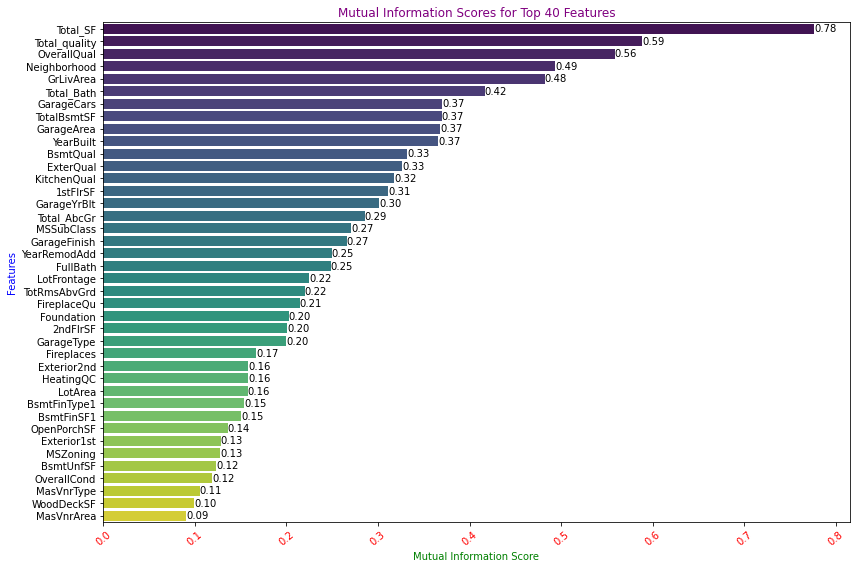

In [49]:
# MI score after feature engineering
plot_mi_score(mi_scores)

In [50]:
df_train_pipeline_2 = df_out.copy()
df_test_pipeline_2 = df_test.copy()

In [51]:
wanted_columns = ['YrSold','FullBath', 'BsmtFullBath', 'HalfBath', 'BsmtHalfBath', 'OverallQual', 'OverallCond','TotRmsAbvGrd', 
                  'KitchenAbvGr', '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'GarageArea']

In [54]:
# Exclude unnecessary columns from MI
columns_to_drop = list(set(mi_scores[76:].index) - set(wanted_columns))
print(columns_to_drop)

['LowQualFinSF', 'MiscFeature', 'Id', 'MiscVal', 'Utilities', 'MoSold', 'Condition2', 'LandSlope']


In [55]:
categorical_features, numerical_features = final_cleaned(df_train_pipeline_2, df_test_pipeline_2, columns_to_drop)

Column count in training dataset: 77
Column count in testing dataset: 72


In [56]:
categorical_features = df_train_pipeline_2.select_dtypes(include=["object", "category"]).columns
numerical_features = df_train_pipeline_2.select_dtypes(include=[np.number]).columns

print(f"Total length of categorical features : {(len(categorical_features))}")
print(f"Total length of numerical features : {(len(numerical_features))}")

Total length of categorical features : 39
Total length of numerical features : 38


### Pipeline with Feature Engineering and OneHot Encoding

In [57]:
# Create pipeline with function transformer and the preprocessor

numerical_cols = numerical_features
categorical_cols = categorical_features

# Remove the target variable
numerical_cols = numerical_cols.drop("SalePrice")

# Combine both transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols),
    ], remainder="passthrough"
)

pipeline_fe_ohe = Pipeline(steps=[
    ('fe', feature_enginerring_transformer),
    ('preprocessor', preprocessor)
])
pipeline_fe_ohe

Pipeline(steps=[('fe',
                 FunctionTransformer(func=<function custom_features at 0x0000029432E59160>)),
                ('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', '...
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'SaleType', 'SaleCondition'],
      dtype='object'))]))])

### Pipeline with Feature Engineering and both OneHot Encoding and Ordinal Encoding

In [58]:
# Categorical ordinal features
ordinal_features  = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 
                     'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond']
print(ordinal_features)

['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond']


In [59]:
# Categorical nominal features
nominal_features = list(set(categorical_features) - set(ordinal_features))
print(nominal_features)

['SaleType', 'RoofStyle', 'LotConfig', 'Fence', 'Condition1', 'Alley', 'BsmtFinType1', 'LandContour', 'Electrical', 'BldgType', 'Foundation', 'Street', 'MSZoning', 'Neighborhood', 'HouseStyle', 'LotShape', 'BsmtExposure', 'CentralAir', 'Heating', 'Functional', 'RoofMatl', 'PoolQC', 'GarageType', 'SaleCondition', 'Exterior1st', 'MasVnrType', 'BsmtFinType2', 'Exterior2nd', 'GarageFinish', 'PavedDrive']


In [60]:
# Ordinal map
ordinal_mapping = ['Ex', 'Gd', 'TA', 'Fa', 'Po']

In [61]:
# Create pipeline with function transformer and the preprocessor

numerical_cols = numerical_features
ordinal_cols = ordinal_features
nominal_cols = nominal_features

# Remove the target variable
numerical_cols = numerical_cols.drop("SalePrice")

# Preprocessing step for numerical columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler())
])

# Preprocessing step for ordinal columns
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('ordinal', OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1, 
                               categories=[ordinal_mapping for _ in ordinal_cols] ))
])

# Preprocessing step for nominal columns
nominal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('onehot', OneHotEncoder(handle_unknown="ignore", sparse=False))
])

# Combine both transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('ordinal', ordinal_transformer, ordinal_cols),
        ('onehot', nominal_transformer, nominal_cols)
    ], remainder="passthrough"
)

pipeline_fe_ohe_ordinal = Pipeline(steps=[
    ('fe', feature_enginerring_transformer),
    ('preprocessor', preprocessor)
])

pipeline_fe_ohe_ordinal

Pipeline(steps=[('fe',
                 FunctionTransformer(func=<function custom_features at 0x0000029432E59160>)),
                ('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', '...
                                                   'LotConfig', 'Fence',
                                                   'Condition1', 'Alley',
                                                   'BsmtFinType1',
                                                   'LandContour', 'Electrical',
                                                   'BldgType', 'Foundation',
                                                   'Street', 'MSZoning',
                                                   'Neighborhood', 'HouseStyle',
                                                   'LotShape', 'BsmtExposure',
                                                   'CentralAir', 'Heating',
                                                   'Functional', 'RoofMatl',
                                                   'PoolQC', 'GarageType',
                                                   'SaleCondition',
                                                   'Exterior1st', 'MasVnrType',
                                                   'BsmtFinType2',
                                                   'Exterior2nd',
                                                   'GarageFinish',
                                                   'PavedDrive'])]))])

In [62]:
# Apply the second pipeline
X = df_train_pipeline_2.drop("SalePrice", axis=1)
# Normalized the dependent variable
y = np.log(df_train_pipeline_2["SalePrice"])

# fit and transform
X_preprocessed_pipeline2 = pipeline_fe_ohe_ordinal.fit_transform(X)
X_test_preprocessed_pipeline2 = pipeline_fe_ohe_ordinal.transform(df_test_pipeline_2)

C:\Users\Python100problems\AppData\Roaming\Python\Python38\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Model Experimentation and Parameter Tuning

In [63]:
"""model_params = {
        'XGBoost':{
        'model':XGBRegressor(),
        'params': {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.1],
            'max_depth': [3,7],
            'min_child_weight': [1, 3, 5],
            'gamma': [0, 0.1, 0.2],
            'reg_alpha': [0, 0.1, 1],
            'reg_lambda': [0, 0.1, 1]
        },
    },
        'CatBoost':{
        'model':CatBoostRegressor(),
        'params':{
            'max_leaves': [8, 10, 12],
           'depth': [3, 4 ,6],
           'od_wait': [150, 200],
           'l2_leaf_reg': [1, 2, 3],
          'iterations': [4800, 6000, 6200, 6400],
           'model_size_reg': [0.4, 0.7],
           'learning_rate': [0.01],
           'random_seed': [42]
           }
        }
}"""

"model_params = {\n        'XGBoost':{\n        'model':XGBRegressor(),\n        'params': {\n            'n_estimators': [100, 200, 300],\n            'learning_rate': [0.1],\n            'max_depth': [3,7],\n            'min_child_weight': [1, 3, 5],\n            'gamma': [0, 0.1, 0.2],\n            'reg_alpha': [0, 0.1, 1],\n            'reg_lambda': [0, 0.1, 1]\n        },\n    },\n        'CatBoost':{\n        'model':CatBoostRegressor(),\n        'params':{\n            'max_leaves': [8, 10, 12],\n           'depth': [3, 4 ,6],\n           'od_wait': [150, 200],\n           'l2_leaf_reg': [1, 2, 3],\n          'iterations': [4800, 6000, 6200, 6400],\n           'model_size_reg': [0.4, 0.7],\n           'learning_rate': [0.01],\n           'random_seed': [42]\n           }\n        }\n}"

### Best Parameters

In [64]:
model_params = {
    'CatBoost': {
        'model': CatBoostRegressor(),
        'params': {
            'depth': [3],
            'iterations': [6200],  
            'learning_rate': [0.01],
            'l2_leaf_reg': [3],
            'max_leaves': [8],
            'model_size_reg': [0.4],
            'od_wait': [150], 
            'random_seed': [42]
        }
    }
}

In [65]:
# Initialize KFold cross-validation
kf_cv = KFold(n_splits=3, shuffle=True, random_state=0)

In [66]:
# Initialize GridSearchCV
best_model_name = None
best_model = None
best_params = None
best_score = float('inf')

for model_name, model in model_params.items():
    grid = GridSearchCV(estimator=model["model"], param_grid=model["params"], cv=kf_cv, scoring="neg_mean_squared_error", return_train_score=False, n_jobs=-1, verbose=2)
    grid.fit(X_preprocessed_pipeline2, y)

    models = model_name
    current_best_score = np.sqrt(-1 * (grid.best_score_))

    print(f"Best parameters for {models} : {grid.best_params_}")
    print(F"Best RMSE for {models} is {current_best_score} \n")

    # Best model with best parameters
    if current_best_score < best_score:
        best_score = current_best_score
        best_model_name = model_name
        best_model = grid.best_estimator_
        best_params = grid.best_params_

print(f"The best model is {best_model_name} with parameters {best_params}")

# Use best model to predcit the SalePrice
y_pred = best_model.predict(X_test_preprocessed_pipeline2)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
0:	learn: 0.3968278	total: 150ms	remaining: 15m 30s
1:	learn: 0.3942526	total: 162ms	remaining: 8m 21s
2:	learn: 0.3917474	total: 172ms	remaining: 5m 55s
3:	learn: 0.3892236	total: 179ms	remaining: 4m 37s
4:	learn: 0.3868965	total: 191ms	remaining: 3m 56s
5:	learn: 0.3845455	total: 196ms	remaining: 3m 22s
6:	learn: 0.3822543	total: 211ms	remaining: 3m 6s
7:	learn: 0.3799254	total: 224ms	remaining: 2m 53s
8:	learn: 0.3777921	total: 230ms	remaining: 2m 38s
9:	learn: 0.3755638	total: 234ms	remaining: 2m 24s
10:	learn: 0.3733693	total: 237ms	remaining: 2m 13s
11:	learn: 0.3711994	total: 241ms	remaining: 2m 4s
12:	learn: 0.3690984	total: 244ms	remaining: 1m 56s
13:	learn: 0.3667903	total: 256ms	remaining: 1m 53s
14:	learn: 0.3647233	total: 260ms	remaining: 1m 47s
15:	learn: 0.3628142	total: 264ms	remaining: 1m 42s
16:	learn: 0.3608069	total: 267ms	remaining: 1m 37s
17:	learn: 0.3587160	total: 270ms	remaining: 1m 32s
18:	learn: 0.356

169:	learn: 0.1919161	total: 1.38s	remaining: 48.9s
170:	learn: 0.1913623	total: 1.38s	remaining: 48.8s
171:	learn: 0.1908618	total: 1.39s	remaining: 48.6s
172:	learn: 0.1903059	total: 1.39s	remaining: 48.5s
173:	learn: 0.1897964	total: 1.4s	remaining: 48.6s
174:	learn: 0.1892985	total: 1.41s	remaining: 48.5s
175:	learn: 0.1888393	total: 1.41s	remaining: 48.4s
176:	learn: 0.1883503	total: 1.42s	remaining: 48.2s
177:	learn: 0.1878831	total: 1.42s	remaining: 48.1s
178:	learn: 0.1874573	total: 1.43s	remaining: 48.2s
179:	learn: 0.1870290	total: 1.45s	remaining: 48.5s
180:	learn: 0.1865269	total: 1.46s	remaining: 48.4s
181:	learn: 0.1860418	total: 1.46s	remaining: 48.2s
182:	learn: 0.1856422	total: 1.46s	remaining: 48.1s
183:	learn: 0.1852248	total: 1.46s	remaining: 47.9s
184:	learn: 0.1847835	total: 1.47s	remaining: 47.7s
185:	learn: 0.1842777	total: 1.48s	remaining: 47.8s
186:	learn: 0.1838854	total: 1.48s	remaining: 47.7s
187:	learn: 0.1833962	total: 1.49s	remaining: 47.6s
188:	learn: 0

341:	learn: 0.1443609	total: 2.4s	remaining: 41.2s
342:	learn: 0.1442112	total: 2.41s	remaining: 41.1s
343:	learn: 0.1440984	total: 2.42s	remaining: 41.2s
344:	learn: 0.1439778	total: 2.43s	remaining: 41.2s
345:	learn: 0.1438389	total: 2.44s	remaining: 41.2s
346:	learn: 0.1437148	total: 2.44s	remaining: 41.2s
347:	learn: 0.1435857	total: 2.45s	remaining: 41.3s
348:	learn: 0.1434391	total: 2.46s	remaining: 41.2s
349:	learn: 0.1432951	total: 2.46s	remaining: 41.2s
350:	learn: 0.1431581	total: 2.47s	remaining: 41.1s
351:	learn: 0.1430177	total: 2.49s	remaining: 41.3s
352:	learn: 0.1428754	total: 2.49s	remaining: 41.3s
353:	learn: 0.1427536	total: 2.5s	remaining: 41.2s
354:	learn: 0.1426333	total: 2.5s	remaining: 41.2s
355:	learn: 0.1425200	total: 2.52s	remaining: 41.3s
356:	learn: 0.1424006	total: 2.52s	remaining: 41.3s
357:	learn: 0.1422849	total: 2.53s	remaining: 41.2s
358:	learn: 0.1421538	total: 2.53s	remaining: 41.2s
359:	learn: 0.1420070	total: 2.53s	remaining: 41.1s
360:	learn: 0.1

514:	learn: 0.1280263	total: 3.42s	remaining: 37.8s
515:	learn: 0.1279700	total: 3.42s	remaining: 37.7s
516:	learn: 0.1278995	total: 3.44s	remaining: 37.8s
517:	learn: 0.1278450	total: 3.44s	remaining: 37.8s
518:	learn: 0.1277868	total: 3.45s	remaining: 37.7s
519:	learn: 0.1277043	total: 3.45s	remaining: 37.7s
520:	learn: 0.1276652	total: 3.45s	remaining: 37.7s
521:	learn: 0.1276057	total: 3.47s	remaining: 37.7s
522:	learn: 0.1275291	total: 3.47s	remaining: 37.7s
523:	learn: 0.1274561	total: 3.48s	remaining: 37.7s
524:	learn: 0.1273925	total: 3.48s	remaining: 37.6s
525:	learn: 0.1273229	total: 3.48s	remaining: 37.6s
526:	learn: 0.1272691	total: 3.5s	remaining: 37.7s
527:	learn: 0.1272166	total: 3.5s	remaining: 37.6s
528:	learn: 0.1271447	total: 3.51s	remaining: 37.6s
529:	learn: 0.1270914	total: 3.51s	remaining: 37.6s
530:	learn: 0.1270235	total: 3.52s	remaining: 37.6s
531:	learn: 0.1269589	total: 3.52s	remaining: 37.6s
532:	learn: 0.1268901	total: 3.53s	remaining: 37.5s
533:	learn: 0.

681:	learn: 0.1191831	total: 4.25s	remaining: 34.4s
682:	learn: 0.1191204	total: 4.25s	remaining: 34.4s
683:	learn: 0.1190814	total: 4.27s	remaining: 34.4s
684:	learn: 0.1190394	total: 4.27s	remaining: 34.4s
685:	learn: 0.1189833	total: 4.27s	remaining: 34.3s
686:	learn: 0.1189379	total: 4.28s	remaining: 34.3s
687:	learn: 0.1188794	total: 4.28s	remaining: 34.3s
688:	learn: 0.1188277	total: 4.28s	remaining: 34.3s
689:	learn: 0.1187888	total: 4.29s	remaining: 34.3s
690:	learn: 0.1187441	total: 4.3s	remaining: 34.3s
691:	learn: 0.1187091	total: 4.3s	remaining: 34.2s
692:	learn: 0.1186600	total: 4.3s	remaining: 34.2s
693:	learn: 0.1186305	total: 4.31s	remaining: 34.2s
694:	learn: 0.1186066	total: 4.31s	remaining: 34.1s
695:	learn: 0.1185525	total: 4.32s	remaining: 34.1s
696:	learn: 0.1184972	total: 4.33s	remaining: 34.1s
697:	learn: 0.1184535	total: 4.33s	remaining: 34.1s
698:	learn: 0.1183988	total: 4.34s	remaining: 34.1s
699:	learn: 0.1183525	total: 4.34s	remaining: 34.1s
700:	learn: 0.1

863:	learn: 0.1117590	total: 5.09s	remaining: 31.5s
864:	learn: 0.1117308	total: 5.1s	remaining: 31.4s
865:	learn: 0.1116983	total: 5.1s	remaining: 31.4s
866:	learn: 0.1116616	total: 5.1s	remaining: 31.4s
867:	learn: 0.1116248	total: 5.11s	remaining: 31.4s
868:	learn: 0.1115867	total: 5.12s	remaining: 31.4s
869:	learn: 0.1115512	total: 5.12s	remaining: 31.4s
870:	learn: 0.1115153	total: 5.13s	remaining: 31.4s
871:	learn: 0.1114687	total: 5.13s	remaining: 31.4s
872:	learn: 0.1114137	total: 5.13s	remaining: 31.3s
873:	learn: 0.1113746	total: 5.14s	remaining: 31.3s
874:	learn: 0.1113353	total: 5.15s	remaining: 31.3s
875:	learn: 0.1113123	total: 5.16s	remaining: 31.3s
876:	learn: 0.1112716	total: 5.16s	remaining: 31.3s
877:	learn: 0.1112226	total: 5.17s	remaining: 31.3s
878:	learn: 0.1111975	total: 5.17s	remaining: 31.3s
879:	learn: 0.1111622	total: 5.17s	remaining: 31.3s
880:	learn: 0.1111231	total: 5.18s	remaining: 31.3s
881:	learn: 0.1110594	total: 5.18s	remaining: 31.2s
882:	learn: 0.1

1050:	learn: 0.1057216	total: 5.93s	remaining: 29.1s
1051:	learn: 0.1056948	total: 5.94s	remaining: 29.1s
1052:	learn: 0.1056649	total: 5.94s	remaining: 29s
1053:	learn: 0.1056348	total: 5.94s	remaining: 29s
1054:	learn: 0.1056078	total: 5.95s	remaining: 29s
1055:	learn: 0.1055835	total: 5.95s	remaining: 29s
1056:	learn: 0.1055507	total: 5.96s	remaining: 29s
1057:	learn: 0.1055205	total: 5.96s	remaining: 29s
1058:	learn: 0.1054914	total: 5.97s	remaining: 29s
1059:	learn: 0.1054666	total: 5.97s	remaining: 29s
1060:	learn: 0.1054218	total: 5.97s	remaining: 28.9s
1061:	learn: 0.1053951	total: 5.98s	remaining: 28.9s
1062:	learn: 0.1053836	total: 5.99s	remaining: 28.9s
1063:	learn: 0.1053534	total: 5.99s	remaining: 28.9s
1064:	learn: 0.1053094	total: 6s	remaining: 28.9s
1065:	learn: 0.1052986	total: 6.01s	remaining: 28.9s
1066:	learn: 0.1052690	total: 6.01s	remaining: 28.9s
1067:	learn: 0.1052409	total: 6.01s	remaining: 28.9s
1068:	learn: 0.1052122	total: 6.02s	remaining: 28.9s
1069:	learn:

1235:	learn: 0.1009871	total: 6.76s	remaining: 27.2s
1236:	learn: 0.1009671	total: 6.77s	remaining: 27.2s
1237:	learn: 0.1009610	total: 6.77s	remaining: 27.1s
1238:	learn: 0.1009493	total: 6.77s	remaining: 27.1s
1239:	learn: 0.1009432	total: 6.78s	remaining: 27.1s
1240:	learn: 0.1009316	total: 6.78s	remaining: 27.1s
1241:	learn: 0.1009063	total: 6.79s	remaining: 27.1s
1242:	learn: 0.1008992	total: 6.8s	remaining: 27.1s
1243:	learn: 0.1008877	total: 6.8s	remaining: 27.1s
1244:	learn: 0.1008586	total: 6.8s	remaining: 27.1s
1245:	learn: 0.1008367	total: 6.81s	remaining: 27.1s
1246:	learn: 0.1008071	total: 6.82s	remaining: 27.1s
1247:	learn: 0.1007795	total: 6.82s	remaining: 27.1s
1248:	learn: 0.1007527	total: 6.83s	remaining: 27.1s
1249:	learn: 0.1007457	total: 6.83s	remaining: 27.1s
1250:	learn: 0.1007276	total: 6.83s	remaining: 27s
1251:	learn: 0.1007076	total: 6.84s	remaining: 27s
1252:	learn: 0.1006792	total: 6.85s	remaining: 27s
1253:	learn: 0.1006545	total: 6.86s	remaining: 27s
1254

1391:	learn: 0.0982055	total: 7.43s	remaining: 25.7s
1392:	learn: 0.0981997	total: 7.44s	remaining: 25.7s
1393:	learn: 0.0981941	total: 7.44s	remaining: 25.6s
1394:	learn: 0.0981724	total: 7.44s	remaining: 25.6s
1395:	learn: 0.0981659	total: 7.45s	remaining: 25.6s
1396:	learn: 0.0981420	total: 7.45s	remaining: 25.6s
1397:	learn: 0.0981355	total: 7.46s	remaining: 25.6s
1398:	learn: 0.0981145	total: 7.46s	remaining: 25.6s
1399:	learn: 0.0980949	total: 7.47s	remaining: 25.6s
1400:	learn: 0.0980774	total: 7.47s	remaining: 25.6s
1401:	learn: 0.0980505	total: 7.47s	remaining: 25.6s
1402:	learn: 0.0980312	total: 7.48s	remaining: 25.6s
1403:	learn: 0.0980031	total: 7.48s	remaining: 25.6s
1404:	learn: 0.0979963	total: 7.49s	remaining: 25.6s
1405:	learn: 0.0979900	total: 7.5s	remaining: 25.6s
1406:	learn: 0.0979793	total: 7.5s	remaining: 25.5s
1407:	learn: 0.0979532	total: 7.5s	remaining: 25.5s
1408:	learn: 0.0979303	total: 7.5s	remaining: 25.5s
1409:	learn: 0.0979241	total: 7.51s	remaining: 25.

1554:	learn: 0.0956308	total: 8.1s	remaining: 24.2s
1555:	learn: 0.0956153	total: 8.11s	remaining: 24.2s
1556:	learn: 0.0956114	total: 8.11s	remaining: 24.2s
1557:	learn: 0.0955936	total: 8.11s	remaining: 24.2s
1558:	learn: 0.0955894	total: 8.12s	remaining: 24.2s
1559:	learn: 0.0955769	total: 8.13s	remaining: 24.2s
1560:	learn: 0.0955596	total: 8.13s	remaining: 24.2s
1561:	learn: 0.0955423	total: 8.13s	remaining: 24.2s
1562:	learn: 0.0955281	total: 8.14s	remaining: 24.1s
1563:	learn: 0.0955100	total: 8.14s	remaining: 24.1s
1564:	learn: 0.0954888	total: 8.14s	remaining: 24.1s
1565:	learn: 0.0954850	total: 8.15s	remaining: 24.1s
1566:	learn: 0.0954660	total: 8.15s	remaining: 24.1s
1567:	learn: 0.0954466	total: 8.16s	remaining: 24.1s
1568:	learn: 0.0954247	total: 8.17s	remaining: 24.1s
1569:	learn: 0.0954084	total: 8.18s	remaining: 24.1s
1570:	learn: 0.0953987	total: 8.18s	remaining: 24.1s
1571:	learn: 0.0953784	total: 8.19s	remaining: 24.1s
1572:	learn: 0.0953604	total: 8.19s	remaining: 

1720:	learn: 0.0932318	total: 8.77s	remaining: 22.8s
1721:	learn: 0.0932217	total: 8.78s	remaining: 22.8s
1722:	learn: 0.0932031	total: 8.78s	remaining: 22.8s
1723:	learn: 0.0931917	total: 8.78s	remaining: 22.8s
1724:	learn: 0.0931754	total: 8.78s	remaining: 22.8s
1725:	learn: 0.0931647	total: 8.79s	remaining: 22.8s
1726:	learn: 0.0931518	total: 8.8s	remaining: 22.8s
1727:	learn: 0.0931330	total: 8.8s	remaining: 22.8s
1728:	learn: 0.0931285	total: 8.81s	remaining: 22.8s
1729:	learn: 0.0931140	total: 8.81s	remaining: 22.8s
1730:	learn: 0.0931101	total: 8.81s	remaining: 22.8s
1731:	learn: 0.0931001	total: 8.82s	remaining: 22.7s
1732:	learn: 0.0930846	total: 8.82s	remaining: 22.7s
1733:	learn: 0.0930646	total: 8.82s	remaining: 22.7s
1734:	learn: 0.0930530	total: 8.83s	remaining: 22.7s
1735:	learn: 0.0930351	total: 8.83s	remaining: 22.7s
1736:	learn: 0.0930167	total: 8.84s	remaining: 22.7s
1737:	learn: 0.0930054	total: 8.84s	remaining: 22.7s
1738:	learn: 0.0930022	total: 8.85s	remaining: 2

1883:	learn: 0.0911284	total: 9.44s	remaining: 21.6s
1884:	learn: 0.0911254	total: 9.44s	remaining: 21.6s
1885:	learn: 0.0911122	total: 9.44s	remaining: 21.6s
1886:	learn: 0.0911035	total: 9.45s	remaining: 21.6s
1887:	learn: 0.0910943	total: 9.45s	remaining: 21.6s
1888:	learn: 0.0910852	total: 9.46s	remaining: 21.6s
1889:	learn: 0.0910712	total: 9.46s	remaining: 21.6s
1890:	learn: 0.0910578	total: 9.47s	remaining: 21.6s
1891:	learn: 0.0910414	total: 9.47s	remaining: 21.6s
1892:	learn: 0.0910202	total: 9.47s	remaining: 21.6s
1893:	learn: 0.0910067	total: 9.48s	remaining: 21.5s
1894:	learn: 0.0909981	total: 9.48s	remaining: 21.5s
1895:	learn: 0.0909865	total: 9.49s	remaining: 21.5s
1896:	learn: 0.0909759	total: 9.49s	remaining: 21.5s
1897:	learn: 0.0909622	total: 9.5s	remaining: 21.5s
1898:	learn: 0.0909412	total: 9.5s	remaining: 21.5s
1899:	learn: 0.0909307	total: 9.5s	remaining: 21.5s
1900:	learn: 0.0909137	total: 9.51s	remaining: 21.5s
1901:	learn: 0.0909046	total: 9.51s	remaining: 21

2046:	learn: 0.0892533	total: 10.1s	remaining: 20.5s
2047:	learn: 0.0892406	total: 10.1s	remaining: 20.5s
2048:	learn: 0.0892265	total: 10.1s	remaining: 20.5s
2049:	learn: 0.0892245	total: 10.1s	remaining: 20.5s
2050:	learn: 0.0892151	total: 10.1s	remaining: 20.5s
2051:	learn: 0.0892027	total: 10.1s	remaining: 20.5s
2052:	learn: 0.0891861	total: 10.1s	remaining: 20.5s
2053:	learn: 0.0891792	total: 10.1s	remaining: 20.4s
2054:	learn: 0.0891697	total: 10.1s	remaining: 20.4s
2055:	learn: 0.0891544	total: 10.1s	remaining: 20.4s
2056:	learn: 0.0891400	total: 10.2s	remaining: 20.4s
2057:	learn: 0.0891318	total: 10.2s	remaining: 20.4s
2058:	learn: 0.0891211	total: 10.2s	remaining: 20.4s
2059:	learn: 0.0891138	total: 10.2s	remaining: 20.4s
2060:	learn: 0.0891061	total: 10.2s	remaining: 20.4s
2061:	learn: 0.0890971	total: 10.2s	remaining: 20.4s
2062:	learn: 0.0890827	total: 10.2s	remaining: 20.4s
2063:	learn: 0.0890723	total: 10.2s	remaining: 20.4s
2064:	learn: 0.0890634	total: 10.2s	remaining:

2206:	learn: 0.0873959	total: 10.8s	remaining: 19.5s
2207:	learn: 0.0873853	total: 10.8s	remaining: 19.5s
2208:	learn: 0.0873746	total: 10.8s	remaining: 19.5s
2209:	learn: 0.0873573	total: 10.8s	remaining: 19.5s
2210:	learn: 0.0873487	total: 10.8s	remaining: 19.5s
2211:	learn: 0.0873367	total: 10.8s	remaining: 19.5s
2212:	learn: 0.0873262	total: 10.8s	remaining: 19.5s
2213:	learn: 0.0873238	total: 10.8s	remaining: 19.5s
2214:	learn: 0.0873216	total: 10.8s	remaining: 19.5s
2215:	learn: 0.0873108	total: 10.8s	remaining: 19.5s
2216:	learn: 0.0873021	total: 10.8s	remaining: 19.5s
2217:	learn: 0.0872893	total: 10.8s	remaining: 19.4s
2218:	learn: 0.0872693	total: 10.8s	remaining: 19.4s
2219:	learn: 0.0872500	total: 10.8s	remaining: 19.4s
2220:	learn: 0.0872387	total: 10.8s	remaining: 19.4s
2221:	learn: 0.0872268	total: 10.9s	remaining: 19.4s
2222:	learn: 0.0872237	total: 10.9s	remaining: 19.4s
2223:	learn: 0.0872141	total: 10.9s	remaining: 19.4s
2224:	learn: 0.0872010	total: 10.9s	remaining:

2365:	learn: 0.0855757	total: 11.5s	remaining: 18.6s
2366:	learn: 0.0855629	total: 11.5s	remaining: 18.6s
2367:	learn: 0.0855539	total: 11.5s	remaining: 18.6s
2368:	learn: 0.0855430	total: 11.5s	remaining: 18.6s
2369:	learn: 0.0855311	total: 11.5s	remaining: 18.6s
2370:	learn: 0.0855131	total: 11.5s	remaining: 18.6s
2371:	learn: 0.0855038	total: 11.5s	remaining: 18.6s
2372:	learn: 0.0854968	total: 11.5s	remaining: 18.6s
2373:	learn: 0.0854847	total: 11.5s	remaining: 18.6s
2374:	learn: 0.0854627	total: 11.5s	remaining: 18.6s
2375:	learn: 0.0854511	total: 11.5s	remaining: 18.6s
2376:	learn: 0.0854427	total: 11.5s	remaining: 18.6s
2377:	learn: 0.0854313	total: 11.5s	remaining: 18.6s
2378:	learn: 0.0854178	total: 11.6s	remaining: 18.6s
2379:	learn: 0.0854039	total: 11.6s	remaining: 18.5s
2380:	learn: 0.0853842	total: 11.6s	remaining: 18.5s
2381:	learn: 0.0853708	total: 11.6s	remaining: 18.5s
2382:	learn: 0.0853644	total: 11.6s	remaining: 18.5s
2383:	learn: 0.0853543	total: 11.6s	remaining:

2541:	learn: 0.0836078	total: 12.4s	remaining: 17.8s
2542:	learn: 0.0836005	total: 12.4s	remaining: 17.8s
2543:	learn: 0.0835941	total: 12.4s	remaining: 17.8s
2544:	learn: 0.0835902	total: 12.4s	remaining: 17.8s
2545:	learn: 0.0835828	total: 12.4s	remaining: 17.8s
2546:	learn: 0.0835730	total: 12.4s	remaining: 17.8s
2547:	learn: 0.0835608	total: 12.4s	remaining: 17.8s
2548:	learn: 0.0835504	total: 12.4s	remaining: 17.7s
2549:	learn: 0.0835384	total: 12.4s	remaining: 17.7s
2550:	learn: 0.0835368	total: 12.4s	remaining: 17.7s
2551:	learn: 0.0835311	total: 12.4s	remaining: 17.7s
2552:	learn: 0.0835236	total: 12.4s	remaining: 17.7s
2553:	learn: 0.0835113	total: 12.4s	remaining: 17.7s
2554:	learn: 0.0835057	total: 12.4s	remaining: 17.7s
2555:	learn: 0.0835000	total: 12.4s	remaining: 17.7s
2556:	learn: 0.0834846	total: 12.4s	remaining: 17.7s
2557:	learn: 0.0834749	total: 12.4s	remaining: 17.7s
2558:	learn: 0.0834682	total: 12.4s	remaining: 17.7s
2559:	learn: 0.0834550	total: 12.4s	remaining:

2697:	learn: 0.0821269	total: 13s	remaining: 16.9s
2698:	learn: 0.0821156	total: 13s	remaining: 16.9s
2699:	learn: 0.0821046	total: 13s	remaining: 16.9s
2700:	learn: 0.0820919	total: 13.1s	remaining: 16.9s
2701:	learn: 0.0820863	total: 13.1s	remaining: 16.9s
2702:	learn: 0.0820780	total: 13.1s	remaining: 16.9s
2703:	learn: 0.0820678	total: 13.1s	remaining: 16.9s
2704:	learn: 0.0820613	total: 13.1s	remaining: 16.9s
2705:	learn: 0.0820541	total: 13.1s	remaining: 16.9s
2706:	learn: 0.0820432	total: 13.1s	remaining: 16.9s
2707:	learn: 0.0820401	total: 13.1s	remaining: 16.9s
2708:	learn: 0.0820344	total: 13.1s	remaining: 16.9s
2709:	learn: 0.0820275	total: 13.1s	remaining: 16.9s
2710:	learn: 0.0820124	total: 13.1s	remaining: 16.9s
2711:	learn: 0.0820060	total: 13.1s	remaining: 16.9s
2712:	learn: 0.0819963	total: 13.1s	remaining: 16.8s
2713:	learn: 0.0819825	total: 13.1s	remaining: 16.8s
2714:	learn: 0.0819664	total: 13.1s	remaining: 16.8s
2715:	learn: 0.0819560	total: 13.1s	remaining: 16.8s

2864:	learn: 0.0805318	total: 13.7s	remaining: 16s
2865:	learn: 0.0805227	total: 13.7s	remaining: 16s
2866:	learn: 0.0805148	total: 13.7s	remaining: 16s
2867:	learn: 0.0805041	total: 13.7s	remaining: 16s
2868:	learn: 0.0804931	total: 13.7s	remaining: 15.9s
2869:	learn: 0.0804843	total: 13.7s	remaining: 15.9s
2870:	learn: 0.0804768	total: 13.7s	remaining: 15.9s
2871:	learn: 0.0804694	total: 13.8s	remaining: 15.9s
2872:	learn: 0.0804605	total: 13.8s	remaining: 15.9s
2873:	learn: 0.0804551	total: 13.8s	remaining: 15.9s
2874:	learn: 0.0804476	total: 13.8s	remaining: 15.9s
2875:	learn: 0.0804375	total: 13.8s	remaining: 15.9s
2876:	learn: 0.0804268	total: 13.8s	remaining: 15.9s
2877:	learn: 0.0804176	total: 13.8s	remaining: 15.9s
2878:	learn: 0.0804017	total: 13.8s	remaining: 15.9s
2879:	learn: 0.0803866	total: 13.8s	remaining: 15.9s
2880:	learn: 0.0803785	total: 13.8s	remaining: 15.9s
2881:	learn: 0.0803607	total: 13.8s	remaining: 15.9s
2882:	learn: 0.0803489	total: 13.8s	remaining: 15.9s
2

3022:	learn: 0.0792142	total: 14.4s	remaining: 15.1s
3023:	learn: 0.0792087	total: 14.4s	remaining: 15.1s
3024:	learn: 0.0791945	total: 14.4s	remaining: 15.1s
3025:	learn: 0.0791865	total: 14.4s	remaining: 15.1s
3026:	learn: 0.0791822	total: 14.4s	remaining: 15.1s
3027:	learn: 0.0791754	total: 14.4s	remaining: 15.1s
3028:	learn: 0.0791590	total: 14.4s	remaining: 15.1s
3029:	learn: 0.0791495	total: 14.4s	remaining: 15.1s
3030:	learn: 0.0791383	total: 14.4s	remaining: 15.1s
3031:	learn: 0.0791370	total: 14.4s	remaining: 15.1s
3032:	learn: 0.0791355	total: 14.4s	remaining: 15.1s
3033:	learn: 0.0791237	total: 14.4s	remaining: 15.1s
3034:	learn: 0.0791147	total: 14.4s	remaining: 15.1s
3035:	learn: 0.0791054	total: 14.4s	remaining: 15.1s
3036:	learn: 0.0790931	total: 14.5s	remaining: 15.1s
3037:	learn: 0.0790876	total: 14.5s	remaining: 15s
3038:	learn: 0.0790718	total: 14.5s	remaining: 15s
3039:	learn: 0.0790704	total: 14.5s	remaining: 15s
3040:	learn: 0.0790663	total: 14.5s	remaining: 15s
3

3207:	learn: 0.0777400	total: 15.2s	remaining: 14.2s
3208:	learn: 0.0777302	total: 15.2s	remaining: 14.2s
3209:	learn: 0.0777284	total: 15.2s	remaining: 14.2s
3210:	learn: 0.0777206	total: 15.2s	remaining: 14.2s
3211:	learn: 0.0777140	total: 15.2s	remaining: 14.2s
3212:	learn: 0.0776984	total: 15.3s	remaining: 14.2s
3213:	learn: 0.0776906	total: 15.3s	remaining: 14.2s
3214:	learn: 0.0776876	total: 15.3s	remaining: 14.2s
3215:	learn: 0.0776783	total: 15.3s	remaining: 14.2s
3216:	learn: 0.0776770	total: 15.3s	remaining: 14.2s
3217:	learn: 0.0776713	total: 15.3s	remaining: 14.2s
3218:	learn: 0.0776642	total: 15.3s	remaining: 14.2s
3219:	learn: 0.0776557	total: 15.3s	remaining: 14.2s
3220:	learn: 0.0776472	total: 15.3s	remaining: 14.2s
3221:	learn: 0.0776343	total: 15.3s	remaining: 14.1s
3222:	learn: 0.0776190	total: 15.3s	remaining: 14.1s
3223:	learn: 0.0776093	total: 15.3s	remaining: 14.1s
3224:	learn: 0.0776037	total: 15.3s	remaining: 14.1s
3225:	learn: 0.0775928	total: 15.3s	remaining:

3368:	learn: 0.0764738	total: 15.9s	remaining: 13.4s
3369:	learn: 0.0764726	total: 15.9s	remaining: 13.4s
3370:	learn: 0.0764679	total: 15.9s	remaining: 13.3s
3371:	learn: 0.0764619	total: 15.9s	remaining: 13.3s
3372:	learn: 0.0764545	total: 15.9s	remaining: 13.3s
3373:	learn: 0.0764487	total: 15.9s	remaining: 13.3s
3374:	learn: 0.0764409	total: 15.9s	remaining: 13.3s
3375:	learn: 0.0764287	total: 15.9s	remaining: 13.3s
3376:	learn: 0.0764276	total: 15.9s	remaining: 13.3s
3377:	learn: 0.0764210	total: 15.9s	remaining: 13.3s
3378:	learn: 0.0764130	total: 15.9s	remaining: 13.3s
3379:	learn: 0.0764082	total: 15.9s	remaining: 13.3s
3380:	learn: 0.0764005	total: 15.9s	remaining: 13.3s
3381:	learn: 0.0763993	total: 16s	remaining: 13.3s
3382:	learn: 0.0763905	total: 16s	remaining: 13.3s
3383:	learn: 0.0763827	total: 16s	remaining: 13.3s
3384:	learn: 0.0763729	total: 16s	remaining: 13.3s
3385:	learn: 0.0763624	total: 16s	remaining: 13.3s
3386:	learn: 0.0763549	total: 16s	remaining: 13.3s
3387:

3526:	learn: 0.0753408	total: 16.6s	remaining: 12.6s
3527:	learn: 0.0753341	total: 16.6s	remaining: 12.5s
3528:	learn: 0.0753263	total: 16.6s	remaining: 12.5s
3529:	learn: 0.0753248	total: 16.6s	remaining: 12.5s
3530:	learn: 0.0753175	total: 16.6s	remaining: 12.5s
3531:	learn: 0.0753136	total: 16.6s	remaining: 12.5s
3532:	learn: 0.0753106	total: 16.6s	remaining: 12.5s
3533:	learn: 0.0753019	total: 16.6s	remaining: 12.5s
3534:	learn: 0.0752932	total: 16.6s	remaining: 12.5s
3535:	learn: 0.0752825	total: 16.6s	remaining: 12.5s
3536:	learn: 0.0752763	total: 16.6s	remaining: 12.5s
3537:	learn: 0.0752730	total: 16.6s	remaining: 12.5s
3538:	learn: 0.0752620	total: 16.6s	remaining: 12.5s
3539:	learn: 0.0752563	total: 16.6s	remaining: 12.5s
3540:	learn: 0.0752471	total: 16.6s	remaining: 12.5s
3541:	learn: 0.0752399	total: 16.6s	remaining: 12.5s
3542:	learn: 0.0752311	total: 16.6s	remaining: 12.5s
3543:	learn: 0.0752255	total: 16.6s	remaining: 12.5s
3544:	learn: 0.0752160	total: 16.6s	remaining:

3685:	learn: 0.0743208	total: 17.2s	remaining: 11.8s
3686:	learn: 0.0743194	total: 17.2s	remaining: 11.7s
3687:	learn: 0.0743161	total: 17.2s	remaining: 11.7s
3688:	learn: 0.0743116	total: 17.2s	remaining: 11.7s
3689:	learn: 0.0743093	total: 17.2s	remaining: 11.7s
3690:	learn: 0.0743014	total: 17.2s	remaining: 11.7s
3691:	learn: 0.0743005	total: 17.3s	remaining: 11.7s
3692:	learn: 0.0742930	total: 17.3s	remaining: 11.7s
3693:	learn: 0.0742921	total: 17.3s	remaining: 11.7s
3694:	learn: 0.0742858	total: 17.3s	remaining: 11.7s
3695:	learn: 0.0742849	total: 17.3s	remaining: 11.7s
3696:	learn: 0.0742798	total: 17.3s	remaining: 11.7s
3697:	learn: 0.0742713	total: 17.3s	remaining: 11.7s
3698:	learn: 0.0742660	total: 17.3s	remaining: 11.7s
3699:	learn: 0.0742615	total: 17.3s	remaining: 11.7s
3700:	learn: 0.0742524	total: 17.3s	remaining: 11.7s
3701:	learn: 0.0742484	total: 17.3s	remaining: 11.7s
3702:	learn: 0.0742475	total: 17.3s	remaining: 11.7s
3703:	learn: 0.0742435	total: 17.3s	remaining:

3850:	learn: 0.0732383	total: 17.9s	remaining: 10.9s
3851:	learn: 0.0732325	total: 17.9s	remaining: 10.9s
3852:	learn: 0.0732288	total: 17.9s	remaining: 10.9s
3853:	learn: 0.0732197	total: 17.9s	remaining: 10.9s
3854:	learn: 0.0732189	total: 17.9s	remaining: 10.9s
3855:	learn: 0.0732148	total: 17.9s	remaining: 10.9s
3856:	learn: 0.0732134	total: 17.9s	remaining: 10.9s
3857:	learn: 0.0732026	total: 17.9s	remaining: 10.9s
3858:	learn: 0.0731975	total: 17.9s	remaining: 10.9s
3859:	learn: 0.0731912	total: 17.9s	remaining: 10.9s
3860:	learn: 0.0731845	total: 17.9s	remaining: 10.9s
3861:	learn: 0.0731740	total: 17.9s	remaining: 10.9s
3862:	learn: 0.0731731	total: 17.9s	remaining: 10.9s
3863:	learn: 0.0731606	total: 18s	remaining: 10.9s
3864:	learn: 0.0731529	total: 18s	remaining: 10.9s
3865:	learn: 0.0731343	total: 18s	remaining: 10.8s
3866:	learn: 0.0731335	total: 18s	remaining: 10.8s
3867:	learn: 0.0731327	total: 18s	remaining: 10.8s
3868:	learn: 0.0731266	total: 18s	remaining: 10.8s
3869:

4021:	learn: 0.0721276	total: 18.6s	remaining: 10.1s
4022:	learn: 0.0721234	total: 18.6s	remaining: 10s
4023:	learn: 0.0721210	total: 18.6s	remaining: 10s
4024:	learn: 0.0721152	total: 18.6s	remaining: 10s
4025:	learn: 0.0721116	total: 18.6s	remaining: 10s
4026:	learn: 0.0721036	total: 18.6s	remaining: 10s
4027:	learn: 0.0720949	total: 18.6s	remaining: 10s
4028:	learn: 0.0720869	total: 18.6s	remaining: 10s
4029:	learn: 0.0720797	total: 18.6s	remaining: 10s
4030:	learn: 0.0720761	total: 18.6s	remaining: 10s
4031:	learn: 0.0720695	total: 18.6s	remaining: 10s
4032:	learn: 0.0720687	total: 18.6s	remaining: 10s
4033:	learn: 0.0720609	total: 18.6s	remaining: 10s
4034:	learn: 0.0720540	total: 18.6s	remaining: 10s
4035:	learn: 0.0720469	total: 18.6s	remaining: 9.99s
4036:	learn: 0.0720379	total: 18.6s	remaining: 9.98s
4037:	learn: 0.0720324	total: 18.6s	remaining: 9.98s
4038:	learn: 0.0720251	total: 18.6s	remaining: 9.97s
4039:	learn: 0.0720204	total: 18.6s	remaining: 9.97s
4040:	learn: 0.0720

4185:	learn: 0.0711336	total: 19.2s	remaining: 9.25s
4186:	learn: 0.0711233	total: 19.2s	remaining: 9.25s
4187:	learn: 0.0711166	total: 19.2s	remaining: 9.24s
4188:	learn: 0.0711101	total: 19.2s	remaining: 9.24s
4189:	learn: 0.0711058	total: 19.3s	remaining: 9.23s
4190:	learn: 0.0710934	total: 19.3s	remaining: 9.23s
4191:	learn: 0.0710850	total: 19.3s	remaining: 9.22s
4192:	learn: 0.0710828	total: 19.3s	remaining: 9.22s
4193:	learn: 0.0710749	total: 19.3s	remaining: 9.21s
4194:	learn: 0.0710719	total: 19.3s	remaining: 9.21s
4195:	learn: 0.0710660	total: 19.3s	remaining: 9.21s
4196:	learn: 0.0710585	total: 19.3s	remaining: 9.21s
4197:	learn: 0.0710578	total: 19.3s	remaining: 9.2s
4198:	learn: 0.0710488	total: 19.3s	remaining: 9.19s
4199:	learn: 0.0710464	total: 19.3s	remaining: 9.19s
4200:	learn: 0.0710398	total: 19.3s	remaining: 9.18s
4201:	learn: 0.0710339	total: 19.3s	remaining: 9.18s
4202:	learn: 0.0710300	total: 19.3s	remaining: 9.17s
4203:	learn: 0.0710283	total: 19.3s	remaining: 

4349:	learn: 0.0701649	total: 19.9s	remaining: 8.46s
4350:	learn: 0.0701593	total: 19.9s	remaining: 8.46s
4351:	learn: 0.0701569	total: 19.9s	remaining: 8.45s
4352:	learn: 0.0701490	total: 19.9s	remaining: 8.45s
4353:	learn: 0.0701420	total: 19.9s	remaining: 8.44s
4354:	learn: 0.0701343	total: 19.9s	remaining: 8.44s
4355:	learn: 0.0701274	total: 19.9s	remaining: 8.44s
4356:	learn: 0.0701232	total: 19.9s	remaining: 8.43s
4357:	learn: 0.0701187	total: 19.9s	remaining: 8.43s
4358:	learn: 0.0701108	total: 19.9s	remaining: 8.42s
4359:	learn: 0.0701047	total: 19.9s	remaining: 8.41s
4360:	learn: 0.0700996	total: 19.9s	remaining: 8.41s
4361:	learn: 0.0700935	total: 20s	remaining: 8.41s
4362:	learn: 0.0700907	total: 20s	remaining: 8.4s
4363:	learn: 0.0700805	total: 20s	remaining: 8.4s
4364:	learn: 0.0700781	total: 20s	remaining: 8.39s
4365:	learn: 0.0700718	total: 20s	remaining: 8.39s
4366:	learn: 0.0700659	total: 20s	remaining: 8.39s
4367:	learn: 0.0700586	total: 20s	remaining: 8.38s
4368:	lea

4505:	learn: 0.0692601	total: 20.6s	remaining: 7.73s
4506:	learn: 0.0692554	total: 20.6s	remaining: 7.73s
4507:	learn: 0.0692517	total: 20.6s	remaining: 7.72s
4508:	learn: 0.0692443	total: 20.6s	remaining: 7.72s
4509:	learn: 0.0692386	total: 20.6s	remaining: 7.71s
4510:	learn: 0.0692310	total: 20.6s	remaining: 7.71s
4511:	learn: 0.0692225	total: 20.6s	remaining: 7.7s
4512:	learn: 0.0692158	total: 20.6s	remaining: 7.7s
4513:	learn: 0.0692121	total: 20.6s	remaining: 7.69s
4514:	learn: 0.0692061	total: 20.6s	remaining: 7.69s
4515:	learn: 0.0692018	total: 20.6s	remaining: 7.69s
4516:	learn: 0.0691957	total: 20.6s	remaining: 7.68s
4517:	learn: 0.0691897	total: 20.6s	remaining: 7.68s
4518:	learn: 0.0691837	total: 20.6s	remaining: 7.67s
4519:	learn: 0.0691728	total: 20.6s	remaining: 7.67s
4520:	learn: 0.0691667	total: 20.6s	remaining: 7.67s
4521:	learn: 0.0691578	total: 20.6s	remaining: 7.66s
4522:	learn: 0.0691500	total: 20.6s	remaining: 7.66s
4523:	learn: 0.0691434	total: 20.6s	remaining: 7

4697:	learn: 0.0681591	total: 21.4s	remaining: 6.84s
4698:	learn: 0.0681534	total: 21.4s	remaining: 6.84s
4699:	learn: 0.0681487	total: 21.4s	remaining: 6.84s
4700:	learn: 0.0681449	total: 21.4s	remaining: 6.83s
4701:	learn: 0.0681369	total: 21.4s	remaining: 6.83s
4702:	learn: 0.0681283	total: 21.4s	remaining: 6.82s
4703:	learn: 0.0681213	total: 21.4s	remaining: 6.82s
4704:	learn: 0.0681194	total: 21.4s	remaining: 6.81s
4705:	learn: 0.0681168	total: 21.4s	remaining: 6.81s
4706:	learn: 0.0681085	total: 21.5s	remaining: 6.8s
4707:	learn: 0.0681002	total: 21.5s	remaining: 6.8s
4708:	learn: 0.0680982	total: 21.5s	remaining: 6.79s
4709:	learn: 0.0680919	total: 21.5s	remaining: 6.79s
4710:	learn: 0.0680907	total: 21.5s	remaining: 6.79s
4711:	learn: 0.0680819	total: 21.5s	remaining: 6.78s
4712:	learn: 0.0680798	total: 21.5s	remaining: 6.78s
4713:	learn: 0.0680715	total: 21.5s	remaining: 6.77s
4714:	learn: 0.0680645	total: 21.5s	remaining: 6.77s
4715:	learn: 0.0680600	total: 21.5s	remaining: 6

4887:	learn: 0.0670779	total: 22.3s	remaining: 5.97s
4888:	learn: 0.0670701	total: 22.3s	remaining: 5.97s
4889:	learn: 0.0670632	total: 22.3s	remaining: 5.96s
4890:	learn: 0.0670573	total: 22.3s	remaining: 5.96s
4891:	learn: 0.0670506	total: 22.3s	remaining: 5.96s
4892:	learn: 0.0670431	total: 22.3s	remaining: 5.95s
4893:	learn: 0.0670374	total: 22.3s	remaining: 5.95s
4894:	learn: 0.0670291	total: 22.3s	remaining: 5.94s
4895:	learn: 0.0670233	total: 22.3s	remaining: 5.94s
4896:	learn: 0.0670155	total: 22.3s	remaining: 5.93s
4897:	learn: 0.0670145	total: 22.3s	remaining: 5.93s
4898:	learn: 0.0670079	total: 22.3s	remaining: 5.92s
4899:	learn: 0.0670024	total: 22.3s	remaining: 5.92s
4900:	learn: 0.0669965	total: 22.3s	remaining: 5.92s
4901:	learn: 0.0669895	total: 22.3s	remaining: 5.91s
4902:	learn: 0.0669853	total: 22.3s	remaining: 5.91s
4903:	learn: 0.0669807	total: 22.3s	remaining: 5.9s
4904:	learn: 0.0669784	total: 22.3s	remaining: 5.9s
4905:	learn: 0.0669775	total: 22.3s	remaining: 5

5081:	learn: 0.0659654	total: 23.1s	remaining: 5.08s
5082:	learn: 0.0659603	total: 23.1s	remaining: 5.08s
5083:	learn: 0.0659533	total: 23.1s	remaining: 5.07s
5084:	learn: 0.0659456	total: 23.1s	remaining: 5.07s
5085:	learn: 0.0659416	total: 23.1s	remaining: 5.06s
5086:	learn: 0.0659383	total: 23.1s	remaining: 5.06s
5087:	learn: 0.0659332	total: 23.1s	remaining: 5.05s
5088:	learn: 0.0659292	total: 23.1s	remaining: 5.05s
5089:	learn: 0.0659248	total: 23.1s	remaining: 5.04s
5090:	learn: 0.0659231	total: 23.1s	remaining: 5.04s
5091:	learn: 0.0659208	total: 23.1s	remaining: 5.04s
5092:	learn: 0.0659148	total: 23.2s	remaining: 5.03s
5093:	learn: 0.0659094	total: 23.2s	remaining: 5.03s
5094:	learn: 0.0659049	total: 23.2s	remaining: 5.02s
5095:	learn: 0.0658996	total: 23.2s	remaining: 5.02s
5096:	learn: 0.0658976	total: 23.2s	remaining: 5.01s
5097:	learn: 0.0658941	total: 23.2s	remaining: 5.01s
5098:	learn: 0.0658864	total: 23.2s	remaining: 5.01s
5099:	learn: 0.0658831	total: 23.2s	remaining:

5269:	learn: 0.0650438	total: 24s	remaining: 4.23s
5270:	learn: 0.0650379	total: 24s	remaining: 4.22s
5271:	learn: 0.0650372	total: 24s	remaining: 4.22s
5272:	learn: 0.0650366	total: 24s	remaining: 4.21s
5273:	learn: 0.0650267	total: 24s	remaining: 4.21s
5274:	learn: 0.0650223	total: 24s	remaining: 4.2s
5275:	learn: 0.0650164	total: 24s	remaining: 4.2s
5276:	learn: 0.0650110	total: 24s	remaining: 4.2s
5277:	learn: 0.0650057	total: 24s	remaining: 4.19s
5278:	learn: 0.0649991	total: 24s	remaining: 4.18s
5279:	learn: 0.0649949	total: 24s	remaining: 4.18s
5280:	learn: 0.0649884	total: 24s	remaining: 4.17s
5281:	learn: 0.0649806	total: 24s	remaining: 4.17s
5282:	learn: 0.0649755	total: 24s	remaining: 4.17s
5283:	learn: 0.0649749	total: 24s	remaining: 4.16s
5284:	learn: 0.0649715	total: 24s	remaining: 4.16s
5285:	learn: 0.0649634	total: 24s	remaining: 4.15s
5286:	learn: 0.0649571	total: 24s	remaining: 4.15s
5287:	learn: 0.0649499	total: 24s	remaining: 4.14s
5288:	learn: 0.0649483	total: 24s	

5430:	learn: 0.0643007	total: 24.6s	remaining: 3.48s
5431:	learn: 0.0642962	total: 24.6s	remaining: 3.48s
5432:	learn: 0.0642896	total: 24.6s	remaining: 3.48s
5433:	learn: 0.0642880	total: 24.6s	remaining: 3.47s
5434:	learn: 0.0642824	total: 24.6s	remaining: 3.47s
5435:	learn: 0.0642781	total: 24.6s	remaining: 3.46s
5436:	learn: 0.0642742	total: 24.6s	remaining: 3.46s
5437:	learn: 0.0642668	total: 24.7s	remaining: 3.46s
5438:	learn: 0.0642625	total: 24.7s	remaining: 3.45s
5439:	learn: 0.0642551	total: 24.7s	remaining: 3.45s
5440:	learn: 0.0642488	total: 24.7s	remaining: 3.44s
5441:	learn: 0.0642427	total: 24.7s	remaining: 3.44s
5442:	learn: 0.0642415	total: 24.7s	remaining: 3.43s
5443:	learn: 0.0642348	total: 24.7s	remaining: 3.43s
5444:	learn: 0.0642315	total: 24.7s	remaining: 3.42s
5445:	learn: 0.0642309	total: 24.7s	remaining: 3.42s
5446:	learn: 0.0642194	total: 24.7s	remaining: 3.42s
5447:	learn: 0.0642155	total: 24.7s	remaining: 3.41s
5448:	learn: 0.0642150	total: 24.7s	remaining:

5600:	learn: 0.0635403	total: 25.5s	remaining: 2.72s
5601:	learn: 0.0635306	total: 25.5s	remaining: 2.72s
5602:	learn: 0.0635269	total: 25.5s	remaining: 2.71s
5603:	learn: 0.0635174	total: 25.5s	remaining: 2.71s
5604:	learn: 0.0635167	total: 25.5s	remaining: 2.71s
5605:	learn: 0.0635119	total: 25.5s	remaining: 2.7s
5606:	learn: 0.0635059	total: 25.5s	remaining: 2.69s
5607:	learn: 0.0635009	total: 25.5s	remaining: 2.69s
5608:	learn: 0.0634914	total: 25.5s	remaining: 2.69s
5609:	learn: 0.0634846	total: 25.5s	remaining: 2.68s
5610:	learn: 0.0634840	total: 25.5s	remaining: 2.68s
5611:	learn: 0.0634759	total: 25.5s	remaining: 2.67s
5612:	learn: 0.0634728	total: 25.5s	remaining: 2.67s
5613:	learn: 0.0634679	total: 25.5s	remaining: 2.67s
5614:	learn: 0.0634612	total: 25.5s	remaining: 2.66s
5615:	learn: 0.0634558	total: 25.5s	remaining: 2.65s
5616:	learn: 0.0634514	total: 25.5s	remaining: 2.65s
5617:	learn: 0.0634475	total: 25.5s	remaining: 2.65s
5618:	learn: 0.0634451	total: 25.6s	remaining: 

5780:	learn: 0.0627099	total: 26.3s	remaining: 1.91s
5781:	learn: 0.0627031	total: 26.3s	remaining: 1.9s
5782:	learn: 0.0626966	total: 26.3s	remaining: 1.9s
5783:	learn: 0.0626898	total: 26.3s	remaining: 1.89s
5784:	learn: 0.0626838	total: 26.3s	remaining: 1.89s
5785:	learn: 0.0626784	total: 26.4s	remaining: 1.89s
5786:	learn: 0.0626715	total: 26.4s	remaining: 1.88s
5787:	learn: 0.0626710	total: 26.4s	remaining: 1.88s
5788:	learn: 0.0626661	total: 26.4s	remaining: 1.87s
5789:	learn: 0.0626603	total: 26.4s	remaining: 1.87s
5790:	learn: 0.0626559	total: 26.4s	remaining: 1.86s
5791:	learn: 0.0626510	total: 26.4s	remaining: 1.86s
5792:	learn: 0.0626461	total: 26.4s	remaining: 1.85s
5793:	learn: 0.0626417	total: 26.4s	remaining: 1.85s
5794:	learn: 0.0626363	total: 26.4s	remaining: 1.84s
5795:	learn: 0.0626322	total: 26.4s	remaining: 1.84s
5796:	learn: 0.0626270	total: 26.4s	remaining: 1.84s
5797:	learn: 0.0626227	total: 26.4s	remaining: 1.83s
5798:	learn: 0.0626161	total: 26.4s	remaining: 1

5957:	learn: 0.0618679	total: 27.2s	remaining: 1.1s
5958:	learn: 0.0618673	total: 27.2s	remaining: 1.1s
5959:	learn: 0.0618630	total: 27.2s	remaining: 1.09s
5960:	learn: 0.0618626	total: 27.2s	remaining: 1.09s
5961:	learn: 0.0618611	total: 27.2s	remaining: 1.08s
5962:	learn: 0.0618561	total: 27.2s	remaining: 1.08s
5963:	learn: 0.0618506	total: 27.2s	remaining: 1.08s
5964:	learn: 0.0618467	total: 27.2s	remaining: 1.07s
5965:	learn: 0.0618411	total: 27.2s	remaining: 1.07s
5966:	learn: 0.0618357	total: 27.2s	remaining: 1.06s
5967:	learn: 0.0618343	total: 27.2s	remaining: 1.06s
5968:	learn: 0.0618272	total: 27.2s	remaining: 1.05s
5969:	learn: 0.0618221	total: 27.2s	remaining: 1.05s
5970:	learn: 0.0618195	total: 27.2s	remaining: 1.04s
5971:	learn: 0.0618148	total: 27.2s	remaining: 1.04s
5972:	learn: 0.0618145	total: 27.2s	remaining: 1.03s
5973:	learn: 0.0618102	total: 27.2s	remaining: 1.03s
5974:	learn: 0.0618096	total: 27.2s	remaining: 1.03s
5975:	learn: 0.0618043	total: 27.3s	remaining: 1

6113:	learn: 0.0612224	total: 27.9s	remaining: 392ms
6114:	learn: 0.0612133	total: 27.9s	remaining: 387ms
6115:	learn: 0.0612086	total: 27.9s	remaining: 383ms
6116:	learn: 0.0612059	total: 27.9s	remaining: 378ms
6117:	learn: 0.0612020	total: 27.9s	remaining: 374ms
6118:	learn: 0.0611965	total: 27.9s	remaining: 369ms
6119:	learn: 0.0611947	total: 27.9s	remaining: 365ms
6120:	learn: 0.0611942	total: 27.9s	remaining: 360ms
6121:	learn: 0.0611894	total: 27.9s	remaining: 355ms
6122:	learn: 0.0611840	total: 27.9s	remaining: 351ms
6123:	learn: 0.0611781	total: 27.9s	remaining: 346ms
6124:	learn: 0.0611734	total: 27.9s	remaining: 342ms
6125:	learn: 0.0611677	total: 27.9s	remaining: 337ms
6126:	learn: 0.0611624	total: 27.9s	remaining: 333ms
6127:	learn: 0.0611597	total: 27.9s	remaining: 328ms
6128:	learn: 0.0611592	total: 27.9s	remaining: 324ms
6129:	learn: 0.0611540	total: 27.9s	remaining: 319ms
6130:	learn: 0.0611475	total: 27.9s	remaining: 314ms
6131:	learn: 0.0611446	total: 27.9s	remaining:

In [67]:
# Convert SalesPrice back to original values
converted_y_pred = np.exp(y_pred)

# Submitting to the Competition

In [ ]:
# Create the submission file
df_catboost = test[['Id']].copy()
df_catboost['SalePrice'] = converted_y_pred
df_catboost.to_csv('submission_catboost_ohe_ordinal.csv', index=False)